# FUZZY C MEANS

In [262]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import calendar

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [263]:
# Cargar perfil fraudulento
fraudster = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/fraudster_LGZ003XXX646.xlsx')
regular_1 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_CIR0141323009.xlsx')
regular_2 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_LGZ0016712983.xlsx')
regular_3 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_SAG0165769023.xlsx')
regular_4 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_SAG0165769025.xlsx')
regular_5 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_SAG0165769026.xlsx')
regular_6 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_SAG0165769030.xlsx')
regular_7 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_SAG0165769051.xlsx')
regular_8 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_SAG0165769054.xlsx')
regular_9 = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/Dataset/regular_SAG0165769067.xlsx')

fraudster['date'] = pd.to_datetime(fraudster['date'])
regular_1['date'] = pd.to_datetime(regular_1['date'])
regular_2['date'] = pd.to_datetime(regular_2['date'])
regular_3['date'] = pd.to_datetime(regular_3['date'])
regular_4['date'] = pd.to_datetime(regular_4['date'])
regular_5['date'] = pd.to_datetime(regular_5['date'])
regular_6['date'] = pd.to_datetime(regular_6['date'])
regular_7['date'] = pd.to_datetime(regular_7['date'])
regular_8['date'] = pd.to_datetime(regular_8['date'])
regular_9['date'] = pd.to_datetime(regular_9['date'])

# Explorar dataframe
print("Fraudster dataframe:")
print(fraudster.head())

print("Regular dataframe:")
print(regular_3.head())

Fraudster dataframe:
                 date  power_real  power_fraud
0 2020-10-01 00:00:00       0.352        0.352
1 2020-10-01 01:00:00       0.750        0.750
2 2020-10-01 02:00:00       0.261        0.261
3 2020-10-01 03:00:00       0.152        0.152
4 2020-10-01 04:00:00       0.142        0.142
Regular dataframe:
                 date             SM  active_imp  active_exp   r1  r2  r3   r4
0 2020-10-01 00:00:00  SAG0165769023         0.0           0  0.0   0   0  0.0
1 2020-10-01 01:00:00  SAG0165769023         0.0           0  0.0   0   0  0.0
2 2020-10-01 02:00:00  SAG0165769023         0.0           0  0.0   0   0  0.0
3 2020-10-01 03:00:00  SAG0165769023         0.0           0  0.0   0   0  0.0
4 2020-10-01 04:00:00  SAG0165769023         0.0           0  0.0   0   0  0.0


In [264]:
regular_1.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_1.rename(columns={"active_imp": "power_real"}, inplace=True)
regular_2.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_2.rename(columns={"active_imp": "power_real"}, inplace=True)
regular_3.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_3.rename(columns={"active_imp": "power_real"}, inplace=True)
regular_4.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_4.rename(columns={"active_imp": "power_real"}, inplace=True)
regular_5.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_5.rename(columns={"active_imp": "power_real"}, inplace=True)
regular_6.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_6.rename(columns={"active_imp": "power_real"}, inplace=True)
regular_7.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_7.rename(columns={"active_imp": "power_real"}, inplace=True)
regular_8.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_8.rename(columns={"active_imp": "power_real"}, inplace=True)
regular_9.drop(columns=['SM','active_exp','r1','r2','r3','r4'], inplace=True)
regular_9.rename(columns={"active_imp": "power_real"}, inplace=True)

regular_1.head()

,date,power_real
0,2020-10-01 00:00:00,0.147
1,2020-10-01 01:00:00,0.181
2,2020-10-01 02:00:00,0.154
3,2020-10-01 03:00:00,0.165
4,2020-10-01 04:00:00,0.148


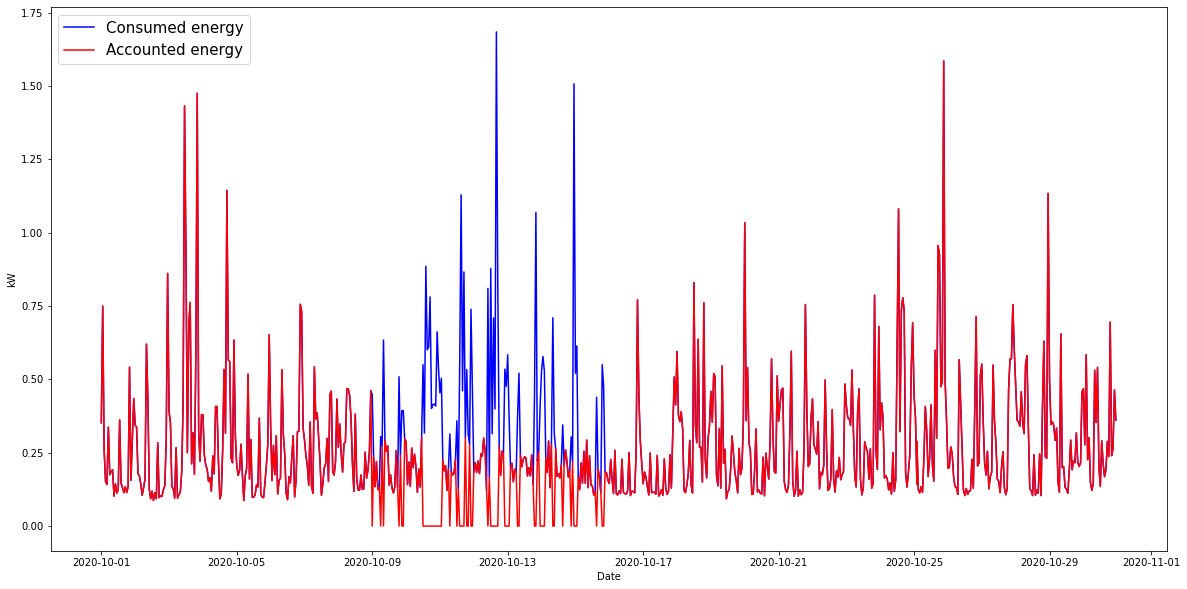

In [265]:
# Plot Real Profile vs. Fraudulent Profile
plt.figure(figsize=(20,10))
plt.plot(fraudster['date'], fraudster['power_real'], 'b', label='Consumed energy')
plt.plot(fraudster['date'], fraudster['power_fraud'], 'r', label='Accounted energy')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

In [266]:
# Crear df nuevo sin "power_real" y con features "day" y "time" derivados de la columna "datetime"
df_fraudster=fraudster.copy()

df_fraudster['day'] = df_fraudster['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_fraudster['time'] = df_fraudster['date'].apply(lambda x:x.strftime('%H:%M'))
df_fraudster.drop(['date'], axis=1, inplace=True)
df_fraudster.rename(columns={"power_fraud": "fraudster fraud", "power_real": "fraudster real"},
                    inplace=True)

df_fraudster.head()

,fraudster real,fraudster fraud,day,time
0,0.352,0.352,20201001,00:00
1,0.750,0.750,20201001,01:00
2,0.261,0.261,20201001,02:00
3,0.152,0.152,20201001,03:00
4,0.142,0.142,20201001,04:00


In [267]:
# Hacemos lo mismo con los dos consumidores honestos
df_regular_1 = regular_1.copy()

df_regular_1['day'] = df_regular_1['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_1['time'] = df_regular_1['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_1.drop(['date'], axis=1, inplace=True)
df_regular_1.rename(columns={"power_real": "regular 1"}, inplace=True)

df_regular_1.head()

,regular 1,day,time
0,0.147,20201001,00:00
1,0.181,20201001,01:00
2,0.154,20201001,02:00
3,0.165,20201001,03:00
4,0.148,20201001,04:00


In [268]:
df_regular_2 = regular_2.copy()

df_regular_2['day'] = df_regular_2['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_2['time'] = df_regular_2['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_2.drop(['date'], axis=1, inplace=True)
df_regular_2.rename(columns={"power_real": "regular 2"}, inplace=True)

df_regular_2.head()

,regular 2,day,time
0,0.379,20201001,00:00
1,0.337,20201001,01:00
2,0.390,20201001,02:00
3,0.342,20201001,03:00
4,0.342,20201001,04:00


In [269]:
df_regular_3 = regular_3.copy()

df_regular_3['day'] = df_regular_3['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_3['time'] = df_regular_3['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_3.drop(['date'], axis=1, inplace=True)
df_regular_3.rename(columns={"power_real": "regular 3"}, inplace=True)

df_regular_3.head()

,regular 3,day,time
0,0.0,20201001,00:00
1,0.0,20201001,01:00
2,0.0,20201001,02:00
3,0.0,20201001,03:00
4,0.0,20201001,04:00


In [270]:
df_regular_4 = regular_4.copy()

df_regular_4['day'] = df_regular_4['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_4['time'] = df_regular_4['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_4.drop(['date'], axis=1, inplace=True)
df_regular_4.rename(columns={"power_real": "regular 4"}, inplace=True)

df_regular_4.head()

,regular 4,day,time
0,0.761,20201001,00:00
1,0.775,20201001,01:00
2,0.794,20201001,02:00
3,0.833,20201001,03:00
4,0.776,20201001,04:00


In [271]:
df_regular_5 = regular_5.copy()

df_regular_5['day'] = df_regular_5['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_5['time'] = df_regular_5['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_5.drop(['date'], axis=1, inplace=True)
df_regular_5.rename(columns={"power_real": "regular 5"}, inplace=True)

df_regular_5.head()

,regular 5,day,time
0,0.118,20201001,00:00
1,0.192,20201001,01:00
2,0.215,20201001,02:00
3,0.201,20201001,03:00
4,0.161,20201001,04:00


In [272]:
df_regular_6 = regular_6.copy()

df_regular_6['day'] = df_regular_6['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_6['time'] = df_regular_6['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_6.drop(['date'], axis=1, inplace=True)
df_regular_6.rename(columns={"power_real": "regular 6"}, inplace=True)

df_regular_6.head()

,regular 6,day,time
0,1.390,20201001,00:00
1,1.170,20201001,01:00
2,0.668,20201001,02:00
3,0.557,20201001,03:00
4,1.289,20201001,04:00


In [273]:
df_regular_7 = regular_7.copy()

df_regular_7['day'] = df_regular_7['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_7['time'] = df_regular_7['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_7.drop(['date'], axis=1, inplace=True)
df_regular_7.rename(columns={"power_real": "regular 7"}, inplace=True)

df_regular_7.head()

,regular 7,day,time
0,0.428,20201001,00:00
1,0.232,20201001,01:00
2,0.201,20201001,02:00
3,0.162,20201001,03:00
4,0.134,20201001,04:00


In [274]:
df_regular_8 = regular_8.copy()

df_regular_8['day'] = df_regular_8['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_8['time'] = df_regular_8['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_8.drop(['date'], axis=1, inplace=True)
df_regular_8.rename(columns={"power_real": "regular 8"}, inplace=True)

df_regular_8.head()

,regular 8,day,time
0,0.256,20201001,00:00
1,0.137,20201001,01:00
2,0.188,20201001,02:00
3,0.174,20201001,03:00
4,0.136,20201001,04:00


In [275]:
df_regular_9 = regular_9.copy()

df_regular_9['day'] = df_regular_9['date'].apply(lambda x:x.strftime('%Y%m%d'))
df_regular_9['time'] = df_regular_9['date'].apply(lambda x:x.strftime('%H:%M'))
df_regular_9.drop(['date'], axis=1, inplace=True)
df_regular_9.rename(columns={"power_real": "regular 9"}, inplace=True)

df_regular_9.head()

,regular 9,day,time
0,0.275,20201001,00:00
1,0.035,20201001,01:00
2,0.018,20201001,02:00
3,0.082,20201001,03:00
4,0.075,20201001,04:00


In [276]:
grid = df_fraudster.copy()
grid['regular 1'] = df_regular_1['regular 1']
grid['regular 2'] = df_regular_2['regular 2']
grid['regular 3'] = df_regular_3['regular 3']
grid['regular 4'] = df_regular_4['regular 4']
grid['regular 5'] = df_regular_5['regular 5']
grid['regular 6'] = df_regular_6['regular 6']
grid['regular 7'] = df_regular_7['regular 7']
grid['regular 8'] = df_regular_8['regular 8']
grid['regular 9'] = df_regular_9['regular 9']
grid['datetime'] = fraudster['date']
grid = grid[['datetime', 'day', 'time', 'fraudster real', 'fraudster fraud', 
             'regular 1', 'regular 2','regular 3','regular 4','regular 5','regular 6','regular 7','regular 8','regular 9']]

grid.head()

,datetime,day,time,fraudster real,fraudster fraud,regular 1,regular 2,regular 3,regular 4,regular 5,regular 6,regular 7,regular 8,regular 9
0,2020-10-01 00:00:00,20201001,00:00,0.352,0.352,0.147,0.379,0.0,0.761,0.118,1.390,0.428,0.256,0.275
1,2020-10-01 01:00:00,20201001,01:00,0.750,0.750,0.181,0.337,0.0,0.775,0.192,1.170,0.232,0.137,0.035
2,2020-10-01 02:00:00,20201001,02:00,0.261,0.261,0.154,0.390,0.0,0.794,0.215,0.668,0.201,0.188,0.018
3,2020-10-01 03:00:00,20201001,03:00,0.152,0.152,0.165,0.342,0.0,0.833,0.201,0.557,0.162,0.174,0.082
4,2020-10-01 04:00:00,20201001,04:00,0.142,0.142,0.148,0.342,0.0,0.776,0.161,1.289,0.134,0.136,0.075


In [277]:
len(grid)

721

In [278]:
# Calculate consumed power and accounted power
real_load = ['fraudster real', 'regular 1', 'regular 2','regular 3','regular 4','regular 5','regular 6','regular 7','regular 8','regular 9']
fraud_load = ['fraudster fraud', 'regular 1', 'regular 2','regular 3','regular 4','regular 5','regular 6','regular 7','regular 8','regular 9']
grid['Consumed Power'] = grid[real_load].sum(axis=1)
grid['Accounted Power'] = grid[fraud_load].sum(axis=1)

grid.head()

,datetime,day,time,fraudster real,fraudster fraud,regular 1,regular 2,regular 3,regular 4,regular 5,regular 6,regular 7,regular 8,regular 9,Consumed Power,Accounted Power
0,2020-10-01 00:00:00,20201001,00:00,0.352,0.352,0.147,0.379,0.0,0.761,0.118,1.390,0.428,0.256,0.275,4.106,4.106
1,2020-10-01 01:00:00,20201001,01:00,0.750,0.750,0.181,0.337,0.0,0.775,0.192,1.170,0.232,0.137,0.035,3.809,3.809
2,2020-10-01 02:00:00,20201001,02:00,0.261,0.261,0.154,0.390,0.0,0.794,0.215,0.668,0.201,0.188,0.018,2.889,2.889
3,2020-10-01 03:00:00,20201001,03:00,0.152,0.152,0.165,0.342,0.0,0.833,0.201,0.557,0.162,0.174,0.082,2.668,2.668
4,2020-10-01 04:00:00,20201001,04:00,0.142,0.142,0.148,0.342,0.0,0.776,0.161,1.289,0.134,0.136,0.075,3.203,3.203


In [279]:
# Add some noise to the Consumed Power
noise = abs(np.random.normal(0,0.01,len(grid)))
grid['Consumed Power'] = grid['Consumed Power'] + noise

grid.head()

,datetime,day,time,fraudster real,fraudster fraud,regular 1,regular 2,regular 3,regular 4,regular 5,regular 6,regular 7,regular 8,regular 9,Consumed Power,Accounted Power
0,2020-10-01 00:00:00,20201001,00:00,0.352,0.352,0.147,0.379,0.0,0.761,0.118,1.390,0.428,0.256,0.275,4.107208,4.106
1,2020-10-01 01:00:00,20201001,01:00,0.750,0.750,0.181,0.337,0.0,0.775,0.192,1.170,0.232,0.137,0.035,3.816177,3.809
2,2020-10-01 02:00:00,20201001,02:00,0.261,0.261,0.154,0.390,0.0,0.794,0.215,0.668,0.201,0.188,0.018,2.904131,2.889
3,2020-10-01 03:00:00,20201001,03:00,0.152,0.152,0.165,0.342,0.0,0.833,0.201,0.557,0.162,0.174,0.082,2.668167,2.668
4,2020-10-01 04:00:00,20201001,04:00,0.142,0.142,0.148,0.342,0.0,0.776,0.161,1.289,0.134,0.136,0.075,3.209781,3.203


In [280]:
# Calculate NTL
grid['NTL'] = grid['Consumed Power'] - grid['Accounted Power']
grid.drop(columns=['fraudster real'], inplace=True)

grid.head()

,datetime,day,time,fraudster fraud,regular 1,regular 2,regular 3,regular 4,regular 5,regular 6,regular 7,regular 8,regular 9,Consumed Power,Accounted Power,NTL
0,2020-10-01 00:00:00,20201001,00:00,0.352,0.147,0.379,0.0,0.761,0.118,1.390,0.428,0.256,0.275,4.107208,4.106,0.001208
1,2020-10-01 01:00:00,20201001,01:00,0.750,0.181,0.337,0.0,0.775,0.192,1.170,0.232,0.137,0.035,3.816177,3.809,0.007177
2,2020-10-01 02:00:00,20201001,02:00,0.261,0.154,0.390,0.0,0.794,0.215,0.668,0.201,0.188,0.018,2.904131,2.889,0.015131
3,2020-10-01 03:00:00,20201001,03:00,0.152,0.165,0.342,0.0,0.833,0.201,0.557,0.162,0.174,0.082,2.668167,2.668,0.000167
4,2020-10-01 04:00:00,20201001,04:00,0.142,0.148,0.342,0.0,0.776,0.161,1.289,0.134,0.136,0.075,3.209781,3.203,0.006781


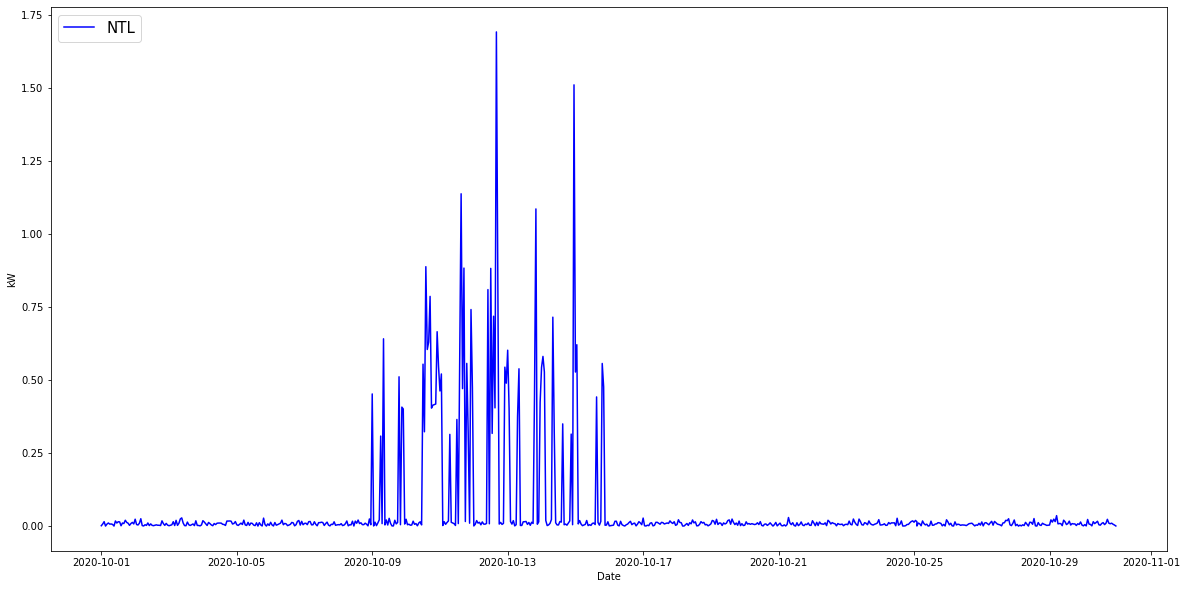

In [281]:
# Plot NTL
plt.figure(figsize=(20,10))
plt.plot(grid['datetime'], grid['NTL'], 'b', label='NTL')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

# Fuzzy C-Means - Fraudster

In [282]:
# https://github.com/omadson/fuzzy-c-means/blob/master/fcmeans/fcm.py

In [283]:
# instalar liberia fuzzy-c-means
# pip install fuzzy-c-means

In [284]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [285]:
# crear copia del dataframe
df_cluster_fraudster = grid[['day','time','fraudster fraud']].copy()
df_cluster_fraudster.rename(columns={"fraudster fraud": "power"}, inplace=True)
df_cluster_fraudster

,day,time,power
0,20201001,00:00,0.352
1,20201001,01:00,0.750
2,20201001,02:00,0.261
3,20201001,03:00,0.152
4,20201001,04:00,0.142
...,...,...,...
716,20201030,19:00,0.695
717,20201030,20:00,0.240
718,20201030,21:00,0.263
719,20201030,22:00,0.464


In [286]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_fraudster['day'].unique()
n=df_cluster_fraudster['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [287]:
# Definimos función "find_peaks" para crear feature

def find_peaks(day, nb_samples):
    daily_max_function = []
    
    for i in range(1,23):    # Look at the second day and the second last one so I can compare i-1, i, i+1
        if i==1 and day[i]>day[i+1]:
            daily_max_function.append(day[i])
        else:
            if i==23 and day[i+1]>day[i]:
                daily_max_function.append(day[i+1])
            if day[i]>day[i-1] and day[i]>day[i+1]:
                daily_max_function.append(day[i])
            
    daily_max_function.sort(reverse = True)
    final_average = sum(daily_max_function[0:nb_samples])/nb_samples
    return(final_average)

In [288]:
# Definimos función "cuts" para crear feature

def cuts(df,mean):
    power = df.iloc[0]['power']
    above = True
    above_0 = (power>mean)
    prev_above = above_0
    cuts = 0
    i=0
    for index, row in df.iterrows():
        if i!=0:
            power = row['power']
            above = power>mean
            if above!=prev_above:
                cuts += 1
                above = (power>mean)
            prev_above=above
            i+=1
        else:
            i+=1
    if above_0!=above:
        cuts += 1    
    return (cuts)

In [289]:
# Definimos función "deep_slopes" para crear feature

def deep_slopes(df, mean):
    power = df.iloc[0]['power']
    previous_p = power
    inc = 0
    dec = 0
    power_0 = power
    for index, row in df.iterrows():
        # print(power, inc, dec)
        power = row['power']
        if power>(previous_p+0.5*mean):
            inc += 1
        elif power<(previous_p-0.5*mean):
            dec += 1
        previous_p = power
    if power_0>(previous_p+0.5*mean):
        inc += 1
    elif power_0>(previous_p-0.5*mean):
        dec += 1
    return (inc,dec)

In [290]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_fraudster['datetime'] =  pd.to_datetime(df_cluster_fraudster['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_fraudster[df_cluster_fraudster['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.232917,0.1540,0.160766,0.750,0.102,0.294375,0.160429,0.258000,8,6,5,0.6460
1,0.219000,0.1355,0.189833,0.861,0.087,0.196375,0.152429,0.244857,6,4,4,0.4785
2,0.418208,0.2925,0.387562,1.475,0.095,0.196125,0.667571,0.495286,6,5,6,1.4535
3,0.328708,0.2410,0.232240,1.144,0.093,0.212625,0.290429,0.523000,10,4,6,0.8890
4,0.207750,0.1720,0.138259,0.652,0.087,0.184375,0.147429,0.227571,10,4,4,0.4430


In [291]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,-0.156318,-0.726049,-0.096084,0.144340,0.502289,0.823497,-0.458634,-0.216681,-0.048853,1.095386,-0.049752,0.264401
1,-0.322353,-1.003855,0.325032,0.471537,0.166435,-0.490196,-0.526472,-0.304524,-0.781651,-0.433060,-0.796030,-0.336511
2,2.054338,1.353740,3.189668,2.281435,0.345557,-0.493547,3.841816,1.369278,-0.781651,0.331163,0.696526,3.161336
3,0.986542,0.580389,0.939411,1.305741,0.300776,-0.272364,0.643735,1.554513,0.683945,-0.433060,0.696526,1.136173
4,-0.456573,-0.455751,-0.422167,-0.144536,0.166435,-0.651056,-0.568871,-0.420058,0.683945,-0.433060,-0.796030,-0.463868


In [292]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [293]:
# Creamos FCM y lo ajustamos al dataframe

fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [294]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.4358972  0.5641028 ]
 [0.48907498 0.510925  ]
 [0.32439622 0.6756038 ]
 [0.18374826 0.81625175]
 [0.66001016 0.33998984]
 [0.26311117 0.7368888 ]
 [0.31469697 0.68530303]
 [0.33670738 0.6632926 ]
 [0.759792   0.24020803]
 [0.75452256 0.24547744]
 [0.85243404 0.14756595]
 [0.8145877  0.18541227]
 [0.77472216 0.22527784]
 [0.8889157  0.11108424]
 [0.87005657 0.1299434 ]
 [0.7203871  0.27961293]
 [0.79518527 0.20481472]
 [0.09161264 0.9083873 ]
 [0.45841247 0.54158753]
 [0.23301524 0.76698476]
 [0.271057   0.728943  ]
 [0.45102653 0.54897344]
 [0.09372875 0.9062713 ]
 [0.18559997 0.8144001 ]
 [0.2851772  0.7148228 ]
 [0.28759557 0.71240443]
 [0.17068385 0.82931614]
 [0.19036219 0.8096378 ]
 [0.2844661  0.7155339 ]
 [0.20155093 0.79844904]]


(30, 2)

In [295]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['fraudster label']
print(fuzzy_r_frame)

    fraudster label
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 1
9                 1
10                1
11                1
12                1
13                1
14                1
15                1
16                1
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                0
29                0


In [296]:
# Añadimos fechas
fraudster_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (fraudster_labels)

         day  fraudster label
0   20201001                0
1   20201002                0
2   20201003                0
3   20201004                0
4   20201005                0
5   20201006                0
6   20201007                0
7   20201008                0
8   20201009                1
9   20201010                1
10  20201011                1
11  20201012                1
12  20201013                1
13  20201014                1
14  20201015                1
15  20201016                1
16  20201017                1
17  20201018                0
18  20201019                0
19  20201020                0
20  20201021                0
21  20201022                0
22  20201023                0
23  20201024                0
24  20201025                0
25  20201026                0
26  20201027                0
27  20201028                0
28  20201029                0
29  20201030                0


# Fuzzy C-Means - Regular Consumer 1

In [297]:
# crear copia del dataframe
df_cluster_regular_1 = grid[['day','time','regular 1']].copy()
df_cluster_regular_1.rename(columns={"regular 1": "power"}, inplace=True)
df_cluster_regular_1

,day,time,power
0,20201001,00:00,0.147
1,20201001,01:00,0.181
2,20201001,02:00,0.154
3,20201001,03:00,0.165
4,20201001,04:00,0.148
...,...,...,...
716,20201030,19:00,0.144
717,20201030,20:00,0.291
718,20201030,21:00,0.290
719,20201030,22:00,0.245


In [298]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_1['day'].unique()
n=df_cluster_regular_1['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [299]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_1['datetime'] =  pd.to_datetime(df_cluster_regular_1['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_1[df_cluster_regular_1['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.186667,0.1615,0.063269,0.355,0.112,0.167625,0.134571,0.254714,4,2,1,0.3205
1,0.239167,0.1760,0.250205,1.357,0.111,0.183750,0.307714,0.220143,6,2,5,0.8530
2,0.204958,0.1745,0.094170,0.561,0.115,0.145625,0.247571,0.225286,6,2,2,0.4420
3,0.206000,0.1910,0.058630,0.369,0.144,0.171625,0.222429,0.222571,8,2,2,0.3500
4,0.165542,0.1430,0.061324,0.368,0.098,0.162125,0.124286,0.206714,8,2,4,0.3075


In [300]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,-0.874509,-0.242367,-1.036878,-1.083615,0.257479,0.272634,-0.577566,-0.605490,-0.48795,-0.09167,-1.047504,-0.955861
1,0.240945,0.383328,0.641352,1.063048,0.174422,1.220702,1.739069,-0.805584,0.48795,-0.09167,2.260403,1.120826
2,-0.485871,0.318601,-0.759462,-0.642285,0.506653,-1.020853,0.934364,-0.775818,0.48795,-0.09167,-0.220527,-0.482026
3,-0.463739,1.030599,-1.078529,-1.053622,2.915332,0.507814,0.597954,-0.791527,1.46385,-0.09167,-0.220527,-0.840815
4,-1.323346,-1.040668,-1.054339,-1.055764,-0.905331,-0.050738,-0.715188,-0.883306,1.46385,-0.09167,1.433426,-1.006560


In [301]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [302]:
# Creamos FCM y lo ajustamos al dataframe

fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [303]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.12261408 0.8773859 ]
 [0.5763712  0.4236288 ]
 [0.14906137 0.8509386 ]
 [0.24596094 0.75403905]
 [0.27784562 0.7221544 ]
 [0.82488614 0.17511386]
 [0.27013582 0.7298642 ]
 [0.07693304 0.9230669 ]
 [0.14803328 0.8519667 ]
 [0.350885   0.649115  ]
 [0.29034343 0.7096566 ]
 [0.24144404 0.75855595]
 [0.17352727 0.8264727 ]
 [0.84100384 0.15899613]
 [0.7380422  0.26195785]
 [0.37869796 0.62130207]
 [0.60129493 0.39870507]
 [0.4298079  0.5701921 ]
 [0.8591589  0.14084113]
 [0.7529873  0.24701269]
 [0.8305675  0.16943252]
 [0.6377087  0.3622913 ]
 [0.8122386  0.1877615 ]
 [0.10232972 0.8976703 ]
 [0.5722111  0.4277889 ]
 [0.5679469  0.4320531 ]
 [0.8117285  0.18827155]
 [0.6237045  0.3762955 ]
 [0.27150807 0.72849196]
 [0.6377362  0.3622638 ]]


(30, 2)

In [304]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 1 label']
print(fuzzy_r_frame)

    regular 1 label
0                 0
1                 0
2                 0
3                 0
4                 0
5                 1
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                1
14                1
15                0
16                0
17                0
18                1
19                1
20                1
21                0
22                1
23                0
24                0
25                0
26                1
27                0
28                0
29                0


In [305]:
# Añadimos fechas
regular_1_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_1_labels)

         day  regular 1 label
0   20201001                0
1   20201002                0
2   20201003                0
3   20201004                0
4   20201005                0
5   20201006                1
6   20201007                0
7   20201008                0
8   20201009                0
9   20201010                0
10  20201011                0
11  20201012                0
12  20201013                0
13  20201014                1
14  20201015                1
15  20201016                0
16  20201017                0
17  20201018                0
18  20201019                1
19  20201020                1
20  20201021                1
21  20201022                0
22  20201023                1
23  20201024                0
24  20201025                0
25  20201026                0
26  20201027                1
27  20201028                0
28  20201029                0
29  20201030                0


# Fuzzy C-Means - Regular Consumer 2

In [306]:
# crear copia del dataframe
df_cluster_regular_2 = grid[['day','time','regular 2']].copy()
df_cluster_regular_2.rename(columns={"regular 2": "power"}, inplace=True)
df_cluster_regular_2

,day,time,power
0,20201001,00:00,0.379
1,20201001,01:00,0.337
2,20201001,02:00,0.390
3,20201001,03:00,0.342
4,20201001,04:00,0.342
...,...,...,...
716,20201030,19:00,2.980
717,20201030,20:00,2.236
718,20201030,21:00,1.062
719,20201030,22:00,0.871


In [307]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_2['day'].unique()
n=df_cluster_regular_2['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [308]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_2['datetime'] =  pd.to_datetime(df_cluster_regular_2['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_2[df_cluster_regular_2['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.528292,0.4790,0.272272,1.673,0.337,0.353625,0.682429,0.575143,8,2,3,1.2495
1,0.541417,0.4945,0.203730,1.210,0.331,0.365375,0.649286,0.630857,8,2,3,1.0280
2,0.524208,0.4325,0.303023,1.222,0.190,0.394125,0.554571,0.713000,8,4,4,1.2105
3,0.394333,0.3390,0.235029,1.088,0.156,0.375625,0.337143,0.512857,6,3,5,0.9720
4,0.358583,0.3370,0.263488,1.427,0.144,0.399125,0.191857,0.463429,8,3,4,1.0730


In [309]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.200186,0.209146,0.387262,1.000849,0.634481,-0.371738,0.697238,-0.076642,0.950255,-0.119310,0.244302,0.746969
1,0.285815,0.318419,-0.192829,0.003375,0.577746,-0.286835,0.553554,0.157855,0.950255,-0.119310,0.244302,0.057244
2,0.173546,-0.118673,0.647517,0.029228,-0.755514,-0.079095,0.142941,0.503588,0.950255,1.670340,1.291309,0.625528
3,-0.673780,-0.777836,0.072070,-0.259458,-1.077009,-0.212771,-0.799675,-0.338798,-0.345547,0.775515,2.338316,-0.117134
4,-0.907018,-0.791936,0.312922,0.470874,-1.190478,-0.042966,-1.429531,-0.546839,0.950255,0.775515,1.291309,0.197368


In [310]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [311]:
# Creamos FCM y lo ajustamos al dataframe

fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [312]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.2626551  0.7373449 ]
 [0.29756328 0.7024367 ]
 [0.53971094 0.46028906]
 [0.7590126  0.24098742]
 [0.7574293  0.24257067]
 [0.6845242  0.31547585]
 [0.8069285  0.19307144]
 [0.3026376  0.69736236]
 [0.4126084  0.5873916 ]
 [0.16818361 0.8318164 ]
 [0.30514225 0.6948578 ]
 [0.77316624 0.22683376]
 [0.21293348 0.7870665 ]
 [0.73528826 0.26471177]
 [0.67579466 0.32420534]
 [0.85510457 0.14489542]
 [0.8705201  0.12947989]
 [0.6794172  0.32058284]
 [0.7465271  0.25347295]
 [0.5962651  0.4037349 ]
 [0.7157344  0.2842656 ]
 [0.6473287  0.35267133]
 [0.9295539  0.0704461 ]
 [0.75703126 0.24296875]
 [0.3918545  0.6081455 ]
 [0.19316456 0.8068354 ]
 [0.16314355 0.8368564 ]
 [0.10856853 0.89143145]
 [0.36178577 0.6382143 ]
 [0.36787307 0.632127  ]]


(30, 2)

In [313]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 2 label']
print(fuzzy_r_frame)

    regular 2 label
0                 0
1                 0
2                 0
3                 1
4                 1
5                 0
6                 1
7                 0
8                 0
9                 0
10                0
11                1
12                0
13                1
14                0
15                1
16                1
17                0
18                1
19                0
20                1
21                0
22                1
23                1
24                0
25                0
26                0
27                0
28                0
29                0


In [314]:
# Añadimos fechas
regular_2_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_2_labels)

         day  regular 2 label
0   20201001                0
1   20201002                0
2   20201003                0
3   20201004                1
4   20201005                1
5   20201006                0
6   20201007                1
7   20201008                0
8   20201009                0
9   20201010                0
10  20201011                0
11  20201012                1
12  20201013                0
13  20201014                1
14  20201015                0
15  20201016                1
16  20201017                1
17  20201018                0
18  20201019                1
19  20201020                0
20  20201021                1
21  20201022                0
22  20201023                1
23  20201024                1
24  20201025                0
25  20201026                0
26  20201027                0
27  20201028                0
28  20201029                0
29  20201030                0


# Fuzzy C-Means - Regular Consumer 3

In [315]:
# crear copia del dataframe
df_cluster_regular_3 = grid[['day','time','regular 3']].copy()
df_cluster_regular_3.rename(columns={"regular 3": "power"}, inplace=True)
df_cluster_regular_3

,day,time,power
0,20201001,00:00,0.000
1,20201001,01:00,0.000
2,20201001,02:00,0.000
3,20201001,03:00,0.000
4,20201001,04:00,0.000
...,...,...,...
716,20201030,19:00,0.185
717,20201030,20:00,0.000
718,20201030,21:00,0.000
719,20201030,22:00,0.000


In [316]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_3['day'].unique()
n=df_cluster_regular_3['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [317]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_3['datetime'] =  pd.to_datetime(df_cluster_regular_3['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_3[df_cluster_regular_3['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.217417,0.0,0.347158,0.810,0.0,0.0,0.490429,0.255000,4,4,3,0.8085
1,0.216750,0.0,0.346199,0.808,0.0,0.0,0.487714,0.255429,4,4,3,0.8055
2,0.217875,0.0,0.347716,0.811,0.0,0.0,0.489714,0.257286,4,4,3,0.8095
3,0.218958,0.0,0.349534,0.815,0.0,0.0,0.492714,0.258000,4,4,3,0.8125
4,0.228083,0.0,0.366240,0.938,0.0,0.0,0.524429,0.257571,4,4,3,0.8760


In [318]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.562918,0.0,0.540091,-0.080051,0.0,0.0,0.962831,0.285352,0.0,0.874475,-0.905753,0.262904
1,0.459052,0.0,0.435497,-0.122184,0.0,0.0,0.795714,0.324500,0.0,0.874475,-0.905753,0.226276
2,0.634325,0.0,0.600969,-0.058985,0.0,0.0,0.918853,0.494146,0.0,0.874475,-0.905753,0.275113
3,0.803107,0.0,0.799289,0.025279,0.0,0.0,1.103562,0.559394,0.0,0.874475,-0.905753,0.311740
4,2.224769,0.0,2.621302,2.616413,0.0,0.0,3.056197,0.520245,0.0,0.874475,-0.905753,1.087021


In [319]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [320]:
# Creamos FCM y lo ajustamos al dataframe
fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [321]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.09049212 0.90950793]
 [0.06447492 0.93552506]
 [0.10762412 0.8923759 ]
 [0.15159248 0.8484075 ]
 [0.3989695  0.6010305 ]
 [0.43355444 0.5664456 ]
 [0.45893115 0.54106885]
 [0.3916411  0.6083589 ]
 [0.27854407 0.721456  ]
 [0.16269338 0.8373066 ]
 [0.2280282  0.77197176]
 [0.11527064 0.8847293 ]
 [0.10684334 0.8931567 ]
 [0.06251891 0.9374811 ]
 [0.21342942 0.7865706 ]
 [0.10707843 0.89292157]
 [0.43550465 0.5644953 ]
 [0.9113856  0.08861443]
 [0.88737434 0.11262564]
 [0.89075315 0.10924684]
 [0.78055376 0.21944624]
 [0.78873634 0.21126366]
 [0.8512785  0.1487215 ]
 [0.5018906  0.49810937]
 [0.765693   0.23430696]
 [0.9200848  0.0799152 ]
 [0.9233129  0.07668711]
 [0.9209798  0.07902027]
 [0.92135954 0.07864045]
 [0.91893744 0.0810625 ]]


(30, 2)

In [322]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 3 label']
print(fuzzy_r_frame)

    regular 3 label
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                1
18                1
19                1
20                1
21                1
22                1
23                0
24                1
25                1
26                1
27                1
28                1
29                1


In [323]:
# Añadimos fechas
regular_3_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_3_labels)

         day  regular 3 label
0   20201001                0
1   20201002                0
2   20201003                0
3   20201004                0
4   20201005                0
5   20201006                0
6   20201007                0
7   20201008                0
8   20201009                0
9   20201010                0
10  20201011                0
11  20201012                0
12  20201013                0
13  20201014                0
14  20201015                0
15  20201016                0
16  20201017                0
17  20201018                1
18  20201019                1
19  20201020                1
20  20201021                1
21  20201022                1
22  20201023                1
23  20201024                0
24  20201025                1
25  20201026                1
26  20201027                1
27  20201028                1
28  20201029                1
29  20201030                1


# Fuzzy C-Means - Regular Consumer 4

In [324]:
# crear copia del dataframe
df_cluster_regular_4 = grid[['day','time','regular 4']].copy()
df_cluster_regular_4.rename(columns={"regular 4": "power"}, inplace=True)
df_cluster_regular_4

,day,time,power
0,20201001,00:00,0.761
1,20201001,01:00,0.775
2,20201001,02:00,0.794
3,20201001,03:00,0.833
4,20201001,04:00,0.776
...,...,...,...
716,20201030,19:00,1.182
717,20201030,20:00,0.778
718,20201030,21:00,1.900
719,20201030,22:00,1.590


In [325]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_4['day'].unique()
n=df_cluster_regular_4['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [326]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_4['datetime'] =  pd.to_datetime(df_cluster_regular_4['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_4[df_cluster_regular_4['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.929125,0.8170,0.486459,2.012,0.185,1.074250,0.704857,0.797429,8,2,5,1.7115
1,0.811375,0.8035,0.469619,1.798,0.207,0.893000,0.661143,0.806286,4,5,4,1.5995
2,0.983083,0.8640,0.407275,1.861,0.263,1.053000,0.906143,0.961714,6,0,2,1.8300
3,0.883750,0.7910,0.335902,1.712,0.292,0.880000,0.948857,0.783286,6,3,1,1.3410
4,0.912500,0.8545,0.412757,1.826,0.253,0.742625,0.922571,0.985429,6,3,3,1.5345


In [327]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.141400,-0.083020,0.991237,0.336774,-0.913056,0.734285,-0.125419,-0.715172,0.630126,-0.455661,2.148345,0.185586
1,-0.628005,-0.174635,0.770839,-0.369330,-0.745987,-0.332621,-0.292016,-0.682042,-1.470294,2.473589,1.074172,-0.256348
2,0.493976,0.235939,-0.045065,-0.161458,-0.320721,0.609199,0.641688,-0.100671,-0.420084,-2.408495,-1.074172,0.653168
3,-0.155091,-0.259465,-0.979124,-0.653092,-0.100494,-0.409144,0.804474,-0.768072,-0.420084,0.520756,-2.148345,-1.276347
4,0.032768,0.171468,0.026688,-0.276943,-0.396662,-1.217785,0.704298,-0.011969,-0.420084,0.520756,0.000000,-0.512827


In [328]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [329]:
# Creamos FCM y lo ajustamos al dataframe
fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [330]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.39512378 0.6048762 ]
 [0.31408715 0.68591285]
 [0.5957015  0.40429848]
 [0.38006434 0.61993563]
 [0.2909575  0.7090425 ]
 [0.30963433 0.6903656 ]
 [0.23062435 0.7693756 ]
 [0.22066648 0.77933353]
 [0.28140378 0.7185962 ]
 [0.21130271 0.7886973 ]
 [0.6557916  0.34420845]
 [0.37622502 0.62377495]
 [0.15457065 0.84542936]
 [0.19056444 0.80943555]
 [0.293881   0.706119  ]
 [0.22714514 0.7728548 ]
 [0.33484238 0.6651576 ]
 [0.42408618 0.5759138 ]
 [0.51638496 0.48361507]
 [0.19101398 0.808986  ]
 [0.33633238 0.6636676 ]
 [0.33699006 0.66300994]
 [0.25942105 0.74057895]
 [0.29246518 0.70753485]
 [0.56179965 0.43820035]
 [0.61603636 0.38396367]
 [0.68605214 0.31394786]
 [0.66974247 0.33025756]
 [0.77626413 0.22373588]
 [0.7229168  0.27708316]]


(30, 2)

In [331]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 4 label']
print(fuzzy_r_frame)

    regular 4 label
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                1
29                1


In [332]:
# Añadimos fechas
regular_4_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_4_labels)

         day  regular 4 label
0   20201001                0
1   20201002                0
2   20201003                0
3   20201004                0
4   20201005                0
5   20201006                0
6   20201007                0
7   20201008                0
8   20201009                0
9   20201010                0
10  20201011                0
11  20201012                0
12  20201013                0
13  20201014                0
14  20201015                0
15  20201016                0
16  20201017                0
17  20201018                0
18  20201019                0
19  20201020                0
20  20201021                0
21  20201022                0
22  20201023                0
23  20201024                0
24  20201025                0
25  20201026                0
26  20201027                0
27  20201028                0
28  20201029                1
29  20201030                1


# Fuzzy C-Means - Regular Consumer 5

In [333]:
# crear copia del dataframe
df_cluster_regular_5 = grid[['day','time','regular 5']].copy()
df_cluster_regular_5.rename(columns={"regular 5": "power"}, inplace=True)
df_cluster_regular_5

,day,time,power
0,20201001,00:00,0.118
1,20201001,01:00,0.192
2,20201001,02:00,0.215
3,20201001,03:00,0.201
4,20201001,04:00,0.161
...,...,...,...
716,20201030,19:00,0.530
717,20201030,20:00,0.433
718,20201030,21:00,0.471
719,20201030,22:00,0.380


In [334]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_5['day'].unique()
n=df_cluster_regular_5['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [335]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_5['datetime'] =  pd.to_datetime(df_cluster_regular_5['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_5[df_cluster_regular_5['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.186083,0.1980,0.050742,0.272,0.104,0.156500,0.178000,0.205429,6,1,2,0.2665
1,0.220542,0.1820,0.175228,0.933,0.108,0.163625,0.173714,0.346714,6,2,0,0.2460
2,0.438833,0.2305,0.391092,1.577,0.102,0.643000,0.179571,0.336429,4,2,5,1.2785
3,0.468000,0.2845,0.359070,1.474,0.099,0.663000,0.206286,0.475857,6,4,3,1.1780
4,0.360750,0.1965,0.305846,0.896,0.099,0.639500,0.150286,0.289143,2,1,3,0.8920


In [336]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,-1.747641,-1.089335,-1.333279,-1.528988,-1.061521,-1.524191,-1.034290,-1.355411,-0.324709,-0.586632,-0.088045,-1.512784
1,-1.448489,-1.227462,-0.211603,-0.194841,-1.022507,-1.476029,-1.058603,-0.383517,-0.324709,0.339629,-1.848947,-1.572587
2,0.446622,-0.808764,1.733445,1.104994,-1.081029,1.764371,-1.025375,-0.454271,-0.897725,0.339629,2.553308,1.439464
3,0.699834,-0.342584,1.444910,0.897101,-1.110290,1.899564,-0.873822,0.504848,-0.324709,2.192152,0.792406,1.146281
4,-0.231263,-1.102284,0.965332,-0.269521,-1.110290,1.740713,-1.191516,-0.779546,-1.470741,-0.586632,0.792406,0.311950


In [337]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [338]:
# Creamos FCM y lo ajustamos al dataframe
fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [339]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.15901102 0.840989  ]
 [0.1732833  0.82671666]
 [0.5062059  0.49379405]
 [0.5524397  0.44756034]
 [0.31483784 0.6851621 ]
 [0.21102074 0.78897923]
 [0.19335526 0.8066447 ]
 [0.19741617 0.8025839 ]
 [0.15686451 0.8431355 ]
 [0.462292   0.53770804]
 [0.12395636 0.8760436 ]
 [0.2861904  0.7138096 ]
 [0.18833856 0.8116615 ]
 [0.19177549 0.8082245 ]
 [0.82025903 0.17974097]
 [0.75206524 0.24793476]
 [0.81418866 0.18581128]
 [0.79386884 0.20613116]
 [0.9219995  0.07800043]
 [0.5835936  0.41640636]
 [0.5875477  0.41245225]
 [0.8757447  0.12425526]
 [0.7357669  0.26423308]
 [0.8154197  0.18458034]
 [0.9253752  0.07462472]
 [0.7411453  0.2588547 ]
 [0.88626724 0.11373279]
 [0.65850157 0.3414984 ]
 [0.73271793 0.26728204]
 [0.831812   0.16818795]]


(30, 2)

In [340]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 5 label']
print(fuzzy_r_frame)

    regular 5 label
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                1
15                1
16                1
17                1
18                1
19                0
20                0
21                1
22                1
23                1
24                1
25                1
26                1
27                0
28                1
29                1


In [341]:
# Añadimos fechas
regular_5_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_5_labels)

         day  regular 5 label
0   20201001                0
1   20201002                0
2   20201003                0
3   20201004                0
4   20201005                0
5   20201006                0
6   20201007                0
7   20201008                0
8   20201009                0
9   20201010                0
10  20201011                0
11  20201012                0
12  20201013                0
13  20201014                0
14  20201015                1
15  20201016                1
16  20201017                1
17  20201018                1
18  20201019                1
19  20201020                0
20  20201021                0
21  20201022                1
22  20201023                1
23  20201024                1
24  20201025                1
25  20201026                1
26  20201027                1
27  20201028                0
28  20201029                1
29  20201030                1


# Fuzzy C-Means - Regular Consumer 6

In [342]:
# crear copia del dataframe
df_cluster_regular_6 = grid[['day','time','regular 6']].copy()
df_cluster_regular_6.rename(columns={"regular 6": "power"}, inplace=True)
df_cluster_regular_6

,day,time,power
0,20201001,00:00,1.390
1,20201001,01:00,1.170
2,20201001,02:00,0.668
3,20201001,03:00,0.557
4,20201001,04:00,1.289
...,...,...,...
716,20201030,19:00,0.705
717,20201030,20:00,0.928
718,20201030,21:00,1.047
719,20201030,22:00,1.455


In [343]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_6['day'].unique()
n=df_cluster_regular_6['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [344]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_6['datetime'] =  pd.to_datetime(df_cluster_regular_6['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_6[df_cluster_regular_6['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,1.334792,1.2480,0.524897,2.421,0.557,1.054125,1.678714,1.174714,8,4,4,2.3610
1,1.181125,1.2315,0.496596,2.555,0.454,1.271000,1.486000,0.752571,12,4,3,2.2155
2,1.227500,1.2285,0.380466,2.282,0.581,1.150875,1.296286,1.211143,12,4,3,1.9105
3,1.167625,1.1505,0.399817,1.945,0.616,1.199500,1.279000,1.014857,10,4,5,1.7265
4,1.557000,1.3980,0.658592,2.872,0.720,1.313000,2.219714,1.101714,6,5,4,2.8275


In [345]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.774496,0.665915,0.100203,-0.314517,-0.157254,-0.402198,0.269712,0.548680,-0.397360,1.003968,0.349780,0.333168
1,-0.807164,0.490394,-0.160583,-0.005911,-1.144886,1.123363,-0.400428,-1.428013,1.192079,1.003968,-0.604165,-0.056876
2,-0.329836,0.458481,-1.230694,-0.634637,0.072874,0.278369,-1.060135,0.719258,1.192079,1.003968,-0.604165,-0.874494
3,-0.946117,-0.371253,-1.052380,-1.410757,0.408477,0.620411,-1.120244,-0.199854,0.397360,1.003968,1.303724,-1.367746
4,3.061641,2.261558,1.332178,0.724148,1.405698,1.418803,2.150971,0.206856,-1.192079,1.776252,0.349780,1.583722


In [346]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [347]:
# Creamos FCM y lo ajustamos al dataframe
fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [348]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.4047647  0.5952353 ]
 [0.6377283  0.36227176]
 [0.815285   0.18471496]
 [0.733899   0.26610103]
 [0.3936391  0.6063609 ]
 [0.5360978  0.4639022 ]
 [0.72365737 0.27634263]
 [0.2909367  0.7090633 ]
 [0.55925274 0.44074723]
 [0.6459873  0.3540127 ]
 [0.56060964 0.43939042]
 [0.35478368 0.6452163 ]
 [0.2480741  0.7519259 ]
 [0.6959682  0.30403176]
 [0.30953833 0.6904617 ]
 [0.5495408  0.45045915]
 [0.25875148 0.74124855]
 [0.34780473 0.6521953 ]
 [0.31770203 0.682298  ]
 [0.6280172  0.3719828 ]
 [0.6999911  0.30000892]
 [0.217483   0.782517  ]
 [0.51404655 0.4859535 ]
 [0.38865325 0.6113468 ]
 [0.63006306 0.3699369 ]
 [0.6176874  0.3823126 ]
 [0.62144697 0.37855303]
 [0.7294209  0.2705791 ]
 [0.2977942  0.7022058 ]
 [0.66864395 0.33135602]]


(30, 2)

In [349]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 6 label']
print(fuzzy_r_frame)

    regular 6 label
0                 0
1                 0
2                 1
3                 1
4                 0
5                 0
6                 1
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                1
28                0
29                0


In [350]:
# Añadimos fechas
regular_6_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_6_labels)

         day  regular 6 label
0   20201001                0
1   20201002                0
2   20201003                1
3   20201004                1
4   20201005                0
5   20201006                0
6   20201007                1
7   20201008                0
8   20201009                0
9   20201010                0
10  20201011                0
11  20201012                0
12  20201013                0
13  20201014                0
14  20201015                0
15  20201016                0
16  20201017                0
17  20201018                0
18  20201019                0
19  20201020                0
20  20201021                0
21  20201022                0
22  20201023                0
23  20201024                0
24  20201025                0
25  20201026                0
26  20201027                0
27  20201028                1
28  20201029                0
29  20201030                0


# Fuzzy C-Means - Regular Consumer 7

In [351]:
# crear copia del dataframe
df_cluster_regular_7 = grid[['day','time','regular 7']].copy()
df_cluster_regular_7.rename(columns={"regular 7": "power"}, inplace=True)
df_cluster_regular_7

,day,time,power
0,20201001,00:00,0.428
1,20201001,01:00,0.232
2,20201001,02:00,0.201
3,20201001,03:00,0.162
4,20201001,04:00,0.134
...,...,...,...
716,20201030,19:00,1.570
717,20201030,20:00,0.606
718,20201030,21:00,1.544
719,20201030,22:00,0.333


In [352]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_7['day'].unique()
n=df_cluster_regular_7['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [353]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_7['datetime'] =  pd.to_datetime(df_cluster_regular_7['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_7[df_cluster_regular_7['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.438083,0.2740,0.349797,1.352,0.134,0.326250,0.419714,0.520429,6,3,5,1.2275
1,0.525208,0.2975,0.449414,1.517,0.135,0.212750,0.690000,0.802429,8,5,5,1.4725
2,0.467458,0.5380,0.198075,0.693,0.136,0.233625,0.606571,0.595143,2,0,1,0.6905
3,0.464625,0.2810,0.492860,1.746,0.091,0.238500,0.735000,0.527286,4,2,5,1.7005
4,0.481292,0.3370,0.437612,1.714,0.100,0.232000,0.750429,0.513286,8,4,7,1.5430


In [354]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,-0.763781,-0.819905,-0.940444,-0.841777,1.161752,3.455045,-1.225210,-0.792273,-0.504956,-0.815158,-0.201802,-0.913881
1,0.812041,-0.514633,0.455916,-0.252747,1.215371,-0.805885,0.612459,1.153580,0.441836,0.438931,-0.201802,0.022943
2,-0.232478,2.609536,-3.067172,-3.194325,1.268991,-0.022212,0.045229,-0.276730,-2.398539,-2.696291,-2.892493,-2.967247
3,-0.283724,-0.728973,1.064899,0.564754,-1.143879,0.160802,0.918414,-0.744957,-1.451747,-1.442202,-0.201802,0.894763
4,0.017724,-0.001516,0.290482,0.450518,-0.661305,-0.083216,1.023313,-0.841560,0.441836,-0.188113,1.143544,0.292519


In [355]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [356]:
# Creamos FCM y lo ajustamos al dataframe
fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [357]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.3942218  0.6057782 ]
 [0.66047496 0.33952507]
 [0.41220534 0.58779466]
 [0.44778314 0.5522169 ]
 [0.60485905 0.39514098]
 [0.5584659  0.44153413]
 [0.24332672 0.7566733 ]
 [0.5574744  0.44252563]
 [0.26949024 0.73050976]
 [0.5825962  0.4174038 ]
 [0.32843438 0.6715656 ]
 [0.24301808 0.7569819 ]
 [0.148808   0.851192  ]
 [0.23970772 0.7602923 ]
 [0.76691055 0.23308946]
 [0.43457463 0.5654254 ]
 [0.28421143 0.71578854]
 [0.72019005 0.27980998]
 [0.6820093  0.31799072]
 [0.6980264  0.30197358]
 [0.5854423  0.41455773]
 [0.69307864 0.3069214 ]
 [0.7323662  0.2676338 ]
 [0.2873791  0.71262085]
 [0.6253049  0.37469512]
 [0.6158967  0.38410327]
 [0.771418   0.22858204]
 [0.71135557 0.28864437]
 [0.549911   0.45008898]
 [0.6698112  0.33018884]]


(30, 2)

In [358]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 7 label']
print(fuzzy_r_frame)

    regular 7 label
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                1
15                0
16                0
17                1
18                0
19                0
20                0
21                0
22                1
23                0
24                0
25                0
26                1
27                1
28                0
29                0


In [359]:
# Añadimos fechas
regular_7_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_7_labels)

         day  regular 7 label
0   20201001                0
1   20201002                0
2   20201003                0
3   20201004                0
4   20201005                0
5   20201006                0
6   20201007                0
7   20201008                0
8   20201009                0
9   20201010                0
10  20201011                0
11  20201012                0
12  20201013                0
13  20201014                0
14  20201015                1
15  20201016                0
16  20201017                0
17  20201018                1
18  20201019                0
19  20201020                0
20  20201021                0
21  20201022                0
22  20201023                1
23  20201024                0
24  20201025                0
25  20201026                0
26  20201027                1
27  20201028                1
28  20201029                0
29  20201030                0


# Fuzzy C-Means - Regular Consumer 8

In [360]:
# crear copia del dataframe
df_cluster_regular_8 = grid[['day','time','regular 8']].copy()
df_cluster_regular_8.rename(columns={"regular 8": "power"}, inplace=True)
df_cluster_regular_8

,day,time,power
0,20201001,00:00,0.256
1,20201001,01:00,0.137
2,20201001,02:00,0.188
3,20201001,03:00,0.174
4,20201001,04:00,0.136
...,...,...,...
716,20201030,19:00,0.460
717,20201030,20:00,0.479
718,20201030,21:00,0.521
719,20201030,22:00,0.413


In [361]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_8['day'].unique()
n=df_cluster_regular_8['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [362]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_8['datetime'] =  pd.to_datetime(df_cluster_regular_8['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_8[df_cluster_regular_8['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)
df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.260417,0.2370,0.103898,0.498,0.122,0.180750,0.291571,0.332429,6,1,4,0.4390
1,0.287083,0.2505,0.122032,0.533,0.112,0.184375,0.321571,0.387857,4,1,2,0.5185
2,0.306917,0.2770,0.103414,0.547,0.159,0.221875,0.366429,0.353714,8,2,3,0.5085
3,0.284000,0.2555,0.094068,0.521,0.154,0.211625,0.314143,0.323143,10,2,3,0.4720
4,0.303750,0.2770,0.110130,0.534,0.153,0.230875,0.303143,0.399571,6,3,3,0.5300


In [363]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,-1.046775,-1.625566,-0.497982,-0.526837,-0.767460,-1.811795,-0.492046,-1.625168,-0.289122,-1.285714,0.88473,-0.651380
1,-0.621672,-1.080571,-0.376223,-0.478663,-1.084156,-1.615620,-0.345055,-0.340398,-1.252861,-1.285714,-0.63195,-0.446819
2,-0.305502,-0.010765,-0.501233,-0.459394,0.404315,0.413770,-0.125269,-1.131790,0.674617,0.142857,0.12639,-0.472550
3,-0.670825,-0.878721,-0.563990,-0.495180,0.245967,-0.140930,-0.381453,-1.840400,1.638356,0.142857,0.12639,-0.566468
4,-0.355983,-0.010765,-0.456141,-0.477287,0.214298,0.900824,-0.435349,-0.068874,-0.289122,1.571429,0.12639,-0.417228


In [364]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [365]:
# Creamos FCM y lo ajustamos al dataframe
fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [366]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.78007925 0.21992075]
 [0.7797478  0.22025217]
 [0.9425213  0.05747872]
 [0.86832225 0.1316777 ]
 [0.87862456 0.12137546]
 [0.9122153  0.08778464]
 [0.719636   0.28036398]
 [0.86685985 0.13314019]
 [0.5635604  0.43643957]
 [0.24153808 0.75846195]
 [0.80311126 0.19688874]
 [0.670499   0.32950097]
 [0.8439835  0.15601657]
 [0.8189788  0.1810212 ]
 [0.8620571  0.13794291]
 [0.85958886 0.14041117]
 [0.07962416 0.9203758 ]
 [0.06268446 0.9373156 ]
 [0.8738225  0.12617747]
 [0.8391336  0.16086641]
 [0.5958424  0.40415758]
 [0.961317   0.03868302]
 [0.9548352  0.04516488]
 [0.13396636 0.8660337 ]
 [0.8055141  0.19448589]
 [0.8635982  0.1364018 ]
 [0.8658321  0.13416795]
 [0.80579275 0.19420722]
 [0.7765771  0.22342284]
 [0.89856845 0.10143155]]


(30, 2)

In [367]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 8 label']
print(fuzzy_r_frame)

    regular 8 label
0                 1
1                 1
2                 1
3                 1
4                 1
5                 1
6                 1
7                 1
8                 0
9                 0
10                1
11                0
12                1
13                1
14                1
15                1
16                0
17                0
18                1
19                1
20                0
21                1
22                1
23                0
24                1
25                1
26                1
27                1
28                1
29                1


In [368]:
# Añadimos fechas
regular_8_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_8_labels)

         day  regular 8 label
0   20201001                1
1   20201002                1
2   20201003                1
3   20201004                1
4   20201005                1
5   20201006                1
6   20201007                1
7   20201008                1
8   20201009                0
9   20201010                0
10  20201011                1
11  20201012                0
12  20201013                1
13  20201014                1
14  20201015                1
15  20201016                1
16  20201017                0
17  20201018                0
18  20201019                1
19  20201020                1
20  20201021                0
21  20201022                1
22  20201023                1
23  20201024                0
24  20201025                1
25  20201026                1
26  20201027                1
27  20201028                1
28  20201029                1
29  20201030                1


# Fuzzy C-Means - Regular Consumer 9

In [369]:
# crear copia del dataframe
df_cluster_regular_9 = grid[['day','time','regular 9']].copy()
df_cluster_regular_9.rename(columns={"regular 9": "power"}, inplace=True)
df_cluster_regular_9

,day,time,power
0,20201001,00:00,0.275
1,20201001,01:00,0.035
2,20201001,02:00,0.018
3,20201001,03:00,0.082
4,20201001,04:00,0.075
...,...,...,...
716,20201030,19:00,0.035
717,20201030,20:00,0.169
718,20201030,21:00,0.379
719,20201030,22:00,0.263


In [370]:
# analizar qué días contiene nuestro dataframe
list_days=df_cluster_regular_9['day'].unique()
n=df_cluster_regular_9['day'].nunique()
print('Number of days:', n)
list_days

Number of days: 30


array(['20201001', '20201002', '20201003', '20201004', '20201005',
       '20201006', '20201007', '20201008', '20201009', '20201010',
       '20201011', '20201012', '20201013', '20201014', '20201015',
       '20201016', '20201017', '20201018', '20201019', '20201020',
       '20201021', '20201022', '20201023', '20201024', '20201025',
       '20201026', '20201027', '20201028', '20201029', '20201030'],
      dtype=object)

In [371]:
# Creamos dataframe vacío con los features que nos interesan
df = pd.DataFrame(columns=['day','mean','median','std','max', 'min', 'mean_p1','mean_p2',
                           'mean_p3','n_cuts','inc','dec','peaks_avg'])

# Creamos columna 'datetime' partiendo de la columna 'time' para poder aplicar
# funciones de la libreria dt
df_cluster_regular_9['datetime'] =  pd.to_datetime(df_cluster_regular_9['time'], format='%H:%M')

# Por cada dia en el dataframe calculamos los nuevos features
for day in list_days:
    
    # creamos dataframe con los datos de un solo dia
    daily_ref = df_cluster_regular_6[df_cluster_regular_6['day'] == day]
    
    # media
    mean = daily_ref['power'].mean()
    
    # mediana
    median = daily_ref['power'].median()
    
    # desviación estándar
    std = daily_ref['power'].std()
    
    # máximo
    maxim = daily_ref['power'].max()
    
    # mínimo
    minim = daily_ref['power'].min()
    
    # media entre 0h y 8h
    daily_p1 = daily_ref[daily_ref['datetime'].dt.hour < 8]
    mean_p1 = daily_p1['power'].mean()
    
    # media entre 8h y 16h
    daily_p2 = daily_ref[(daily_ref['datetime'].dt.hour > 8) & (daily_ref['datetime'].dt.hour < 16)]
    mean_p2 = daily_p2['power'].mean()
    
    # media entre 16h y 24h
    daily_p3 = daily_ref[(daily_ref['datetime'].dt.hour > 16) & (daily_ref['datetime'].dt.hour < 24)]
    mean_p3 = daily_p3['power'].mean()
    
    # número de cortes con la media
    n_cuts = cuts(daily_ref,mean)
    
    # número de incrementos y decrementos pronunciados en el consumo
    inc, dec = deep_slopes(daily_ref,mean)
    
    # consumo medio de los 2 picos del dia
    peak = find_peaks(list(daily_ref['power']), 2)
    
    # asignamos cada variable a su columna
    df = df.append({'day':day,'mean':mean,'std':std, 'median':median, 'max': maxim, 'min': minim, 'mean_p1':mean_p1, 
                    'mean_p2':mean_p2, 'mean_p3':mean_p3, 'n_cuts':n_cuts, 'inc':inc, 'dec':dec, 'peaks_avg':peak},
                   ignore_index=True)
    
df_features=df

# extraemos columna con las fechas, conservando el orden
df_date = df_features.iloc[:, 0]

# eliminamos columna 'date' ya que no es un feature
df_features.drop(['day'], axis = 1, inplace = True)

df_features.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,1.334792,1.2480,0.524897,2.421,0.557,1.054125,1.678714,1.174714,8,4,4,2.3610
1,1.181125,1.2315,0.496596,2.555,0.454,1.271000,1.486000,0.752571,12,4,3,2.2155
2,1.227500,1.2285,0.380466,2.282,0.581,1.150875,1.296286,1.211143,12,4,3,1.9105
3,1.167625,1.1505,0.399817,1.945,0.616,1.199500,1.279000,1.014857,10,4,5,1.7265
4,1.557000,1.3980,0.658592,2.872,0.720,1.313000,2.219714,1.101714,6,5,4,2.8275


In [372]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

# Crear instancia para el Standard Scaler 
scaler = StandardScaler()

# Ajustar el scaler con df_features
scaler.fit(df_features)

# Transformar el df_features a uno escalado 
df_features_scaled = pd.DataFrame(scaler.transform(df_features), index=df_features.index, columns=df_features.columns)

df_features_scaled.head()

,mean,median,std,max,min,mean_p1,mean_p2,mean_p3,n_cuts,inc,dec,peaks_avg
0,0.774496,0.665915,0.100203,-0.314517,-0.157254,-0.402198,0.269712,0.548680,-0.397360,1.003968,0.349780,0.333168
1,-0.807164,0.490394,-0.160583,-0.005911,-1.144886,1.123363,-0.400428,-1.428013,1.192079,1.003968,-0.604165,-0.056876
2,-0.329836,0.458481,-1.230694,-0.634637,0.072874,0.278369,-1.060135,0.719258,1.192079,1.003968,-0.604165,-0.874494
3,-0.946117,-0.371253,-1.052380,-1.410757,0.408477,0.620411,-1.120244,-0.199854,0.397360,1.003968,1.303724,-1.367746
4,3.061641,2.261558,1.332178,0.724148,1.405698,1.418803,2.150971,0.206856,-1.192079,1.776252,0.349780,1.583722


In [373]:
# La libreria fuzzy c-means trabaja con arrays en vez de dataframes, transformamos el df a array
new_df = df_features_scaled.to_numpy()

In [374]:
# Creamos FCM y lo ajustamos al dataframe
fcm = FCM(n_clusters=2)
fcm.fit(new_df)

In [375]:
#Fuzzy partition array, returned as an array with n_samples rows and n_clusters columns
df_fcm = fcm.u
print (df_fcm)
type(df_fcm)
df_fcm.shape

[[0.4047647  0.5952353 ]
 [0.6377283  0.36227176]
 [0.815285   0.18471496]
 [0.733899   0.26610103]
 [0.3936391  0.6063609 ]
 [0.5360978  0.4639022 ]
 [0.72365737 0.27634263]
 [0.2909367  0.7090633 ]
 [0.55925274 0.44074723]
 [0.6459873  0.3540127 ]
 [0.56060964 0.43939042]
 [0.35478368 0.6452163 ]
 [0.2480741  0.7519259 ]
 [0.6959682  0.30403176]
 [0.30953833 0.6904617 ]
 [0.5495408  0.45045915]
 [0.25875148 0.74124855]
 [0.34780473 0.6521953 ]
 [0.31770203 0.682298  ]
 [0.6280172  0.3719828 ]
 [0.6999911  0.30000892]
 [0.217483   0.782517  ]
 [0.51404655 0.4859535 ]
 [0.38865325 0.6113468 ]
 [0.63006306 0.3699369 ]
 [0.6176874  0.3823126 ]
 [0.62144697 0.37855303]
 [0.7294209  0.2705791 ]
 [0.2977942  0.7022058 ]
 [0.66864395 0.33135602]]


(30, 2)

In [376]:
# Probabilidad de pertenecer en el cluster 1 o 0
fuzzy_results = [] 
percentage = 0.30 # Parámetro a escoger para tunear el algoritmo
for c in range(0,30):
    if df_fcm[c][1]< percentage:
        fuzzy_results.append(1) 
    else:
        fuzzy_results.append(0)
        
fuzzy_r = np.array([fuzzy_results]).T
fuzzy_r_frame = pd.DataFrame(fuzzy_r)   
fuzzy_r_frame.columns=['regular 9 label']
print(fuzzy_r_frame)

    regular 9 label
0                 0
1                 0
2                 1
3                 1
4                 0
5                 0
6                 1
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                1
28                0
29                0


In [377]:
# Añadimos fechas
regular_9_labels = pd.concat([df_date, fuzzy_r_frame], axis=1)
print (regular_9_labels)

         day  regular 9 label
0   20201001                0
1   20201002                0
2   20201003                1
3   20201004                1
4   20201005                0
5   20201006                0
6   20201007                1
7   20201008                0
8   20201009                0
9   20201010                0
10  20201011                0
11  20201012                0
12  20201013                0
13  20201014                0
14  20201015                0
15  20201016                0
16  20201017                0
17  20201018                0
18  20201019                0
19  20201020                0
20  20201021                0
21  20201022                0
22  20201023                0
23  20201024                0
24  20201025                0
25  20201026                0
26  20201027                0
27  20201028                1
28  20201029                0
29  20201030                0


# Comparison NTL vs. Profiles

In [378]:
grid_label = grid.merge(fraudster_labels, on='day')
grid_label = grid_label.merge(regular_1_labels, on='day')
grid_label = grid_label.merge(regular_2_labels, on='day')
grid_label = grid_label.merge(regular_3_labels, on='day')
grid_label = grid_label.merge(regular_4_labels, on='day')
grid_label = grid_label.merge(regular_5_labels, on='day')
grid_label = grid_label.merge(regular_6_labels, on='day')
grid_label = grid_label.merge(regular_7_labels, on='day')
grid_label = grid_label.merge(regular_8_labels, on='day')
grid_label = grid_label.merge(regular_9_labels, on='day')
grid_label

,datetime,day,time,fraudster fraud,regular 1,regular 2,regular 3,regular 4,regular 5,regular 6,regular 7,regular 8,regular 9,Consumed Power,Accounted Power,NTL,fraudster label,regular 1 label,regular 2 label,regular 3 label,regular 4 label,regular 5 label,regular 6 label,regular 7 label,regular 8 label,regular 9 label
0,2020-10-01 00:00:00,20201001,00:00,0.352,0.147,0.379,0.000,0.761,0.118,1.390,0.428,0.256,0.275,4.107208,4.106,0.001208,0,0,0,0,0,0,0,0,1,0
1,2020-10-01 01:00:00,20201001,01:00,0.750,0.181,0.337,0.000,0.775,0.192,1.170,0.232,0.137,0.035,3.816177,3.809,0.007177,0,0,0,0,0,0,0,0,1,0
2,2020-10-01 02:00:00,20201001,02:00,0.261,0.154,0.390,0.000,0.794,0.215,0.668,0.201,0.188,0.018,2.904131,2.889,0.015131,0,0,0,0,0,0,0,0,1,0
3,2020-10-01 03:00:00,20201001,03:00,0.152,0.165,0.342,0.000,0.833,0.201,0.557,0.162,0.174,0.082,2.668167,2.668,0.000167,0,0,0,0,0,0,0,0,1,0
4,2020-10-01 04:00:00,20201001,04:00,0.142,0.148,0.342,0.000,0.776,0.161,1.289,0.134,0.136,0.075,3.209781,3.203,0.006781,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,2020-10-30 19:00:00,20201030,19:00,0.695,0.144,2.980,0.185,1.182,0.530,0.705,1.570,0.460,0.035,8.493992,8.486,0.007992,0,0,0,1,1,1,0,0,1,0
717,2020-10-30 20:00:00,20201030,20:00,0.240,0.291,2.236,0.000,0.778,0.433,0.928,0.606,0.479,0.169,6.170049,6.160,0.010049,0,0,0,1,1,1,0,0,1,0
718,2020-10-30 21:00:00,20201030,21:00,0.263,0.290,1.062,0.000,1.900,0.471,1.047,1.544,0.521,0.379,7.483320,7.477,0.006320,0,0,0,1,1,1,0,0,1,0
719,2020-10-30 22:00:00,20201030,22:00,0.464,0.245,0.871,0.000,1.590,0.380,1.455,0.333,0.413,0.263,6.017743,6.014,0.003743,0,0,0,1,1,1,0,0,1,0


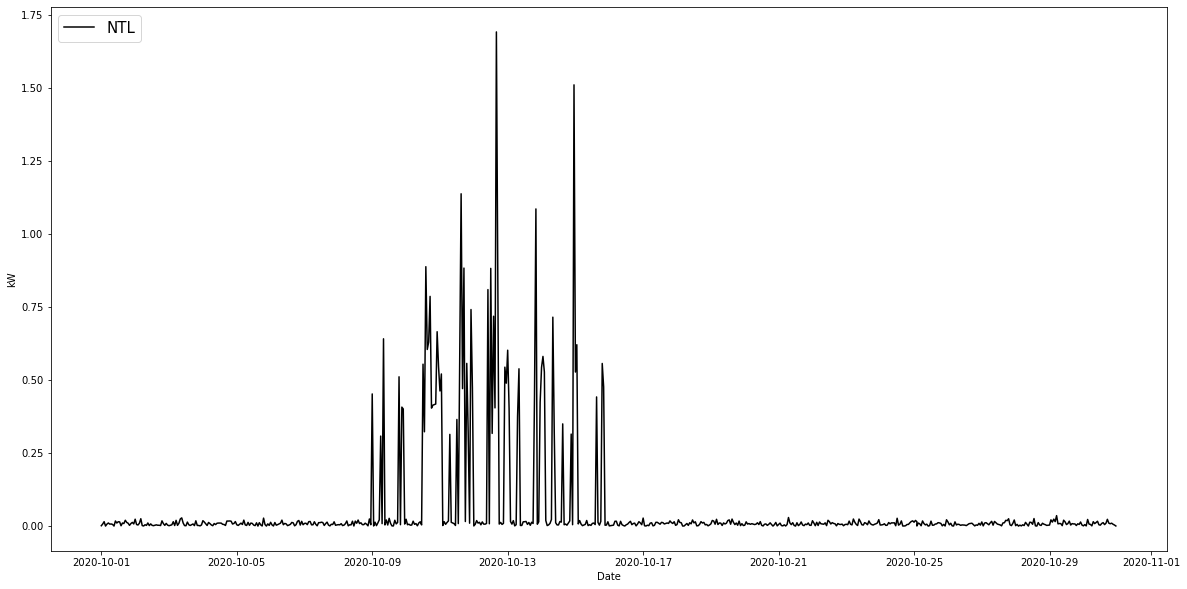

In [379]:
# Plot NTL
plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['NTL'], 'black', label='NTL')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

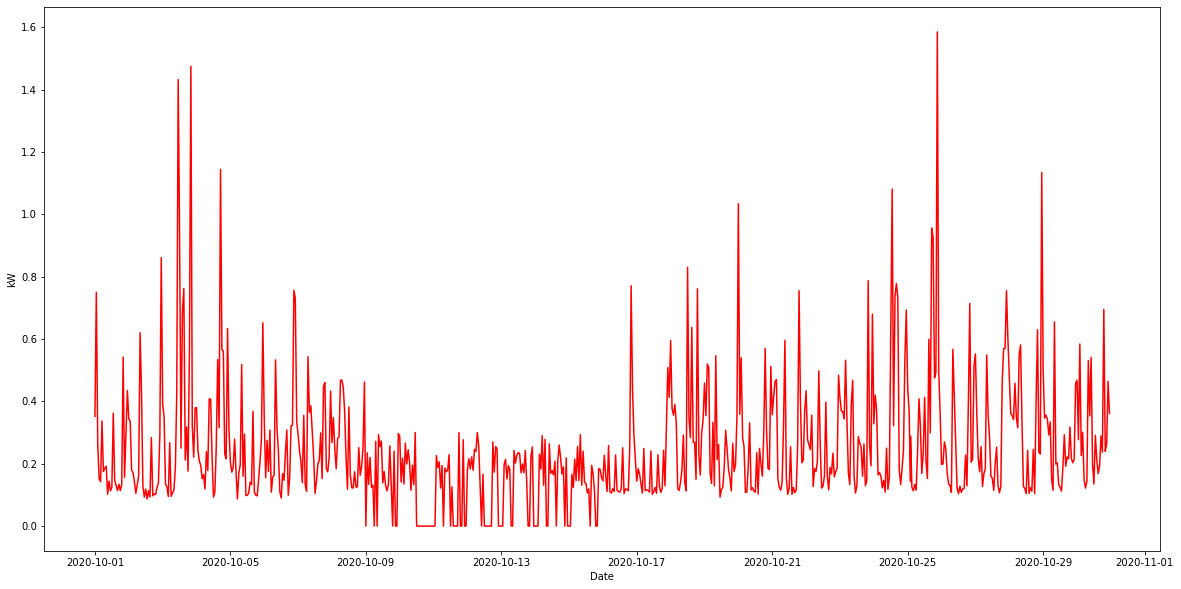

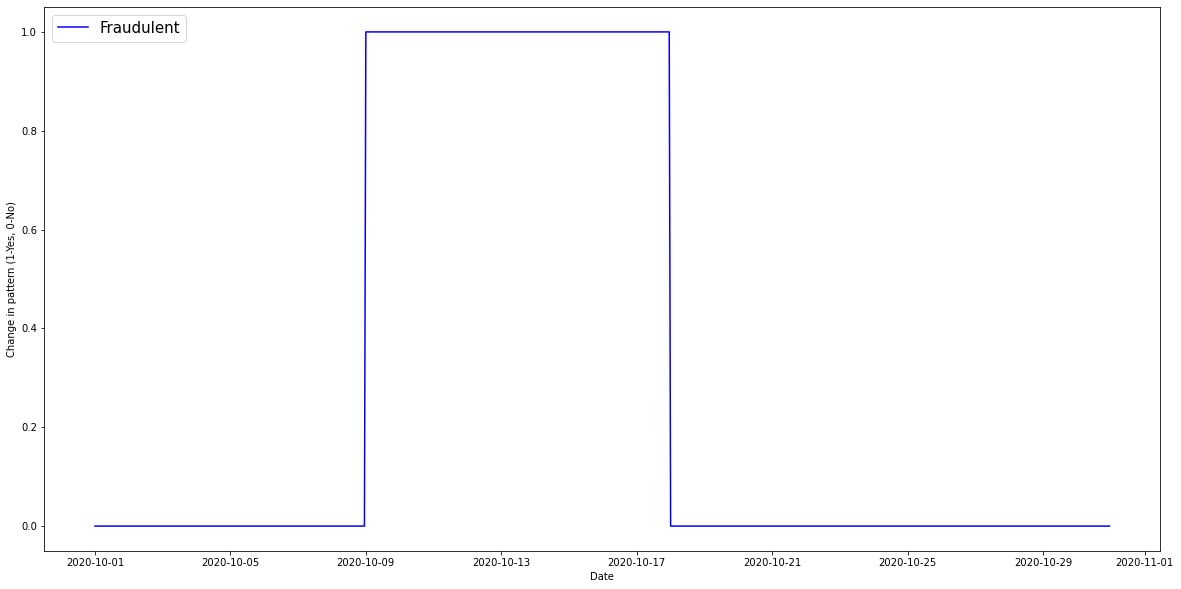

In [380]:
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['fraudster fraud'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['fraudster label'], 'b', label='Fraudulent')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

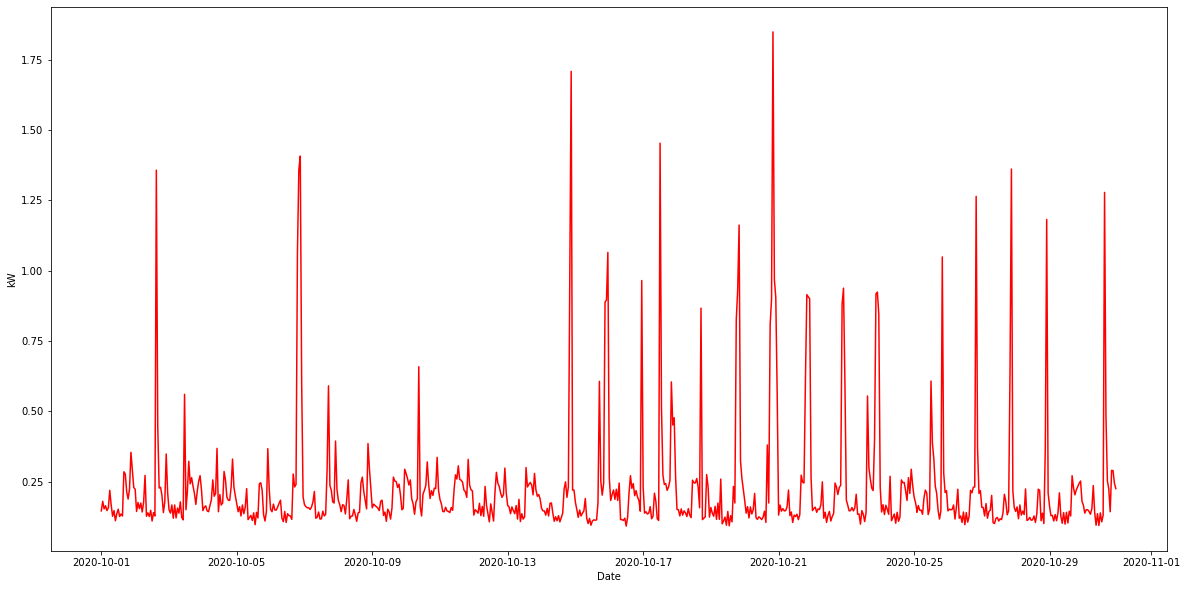

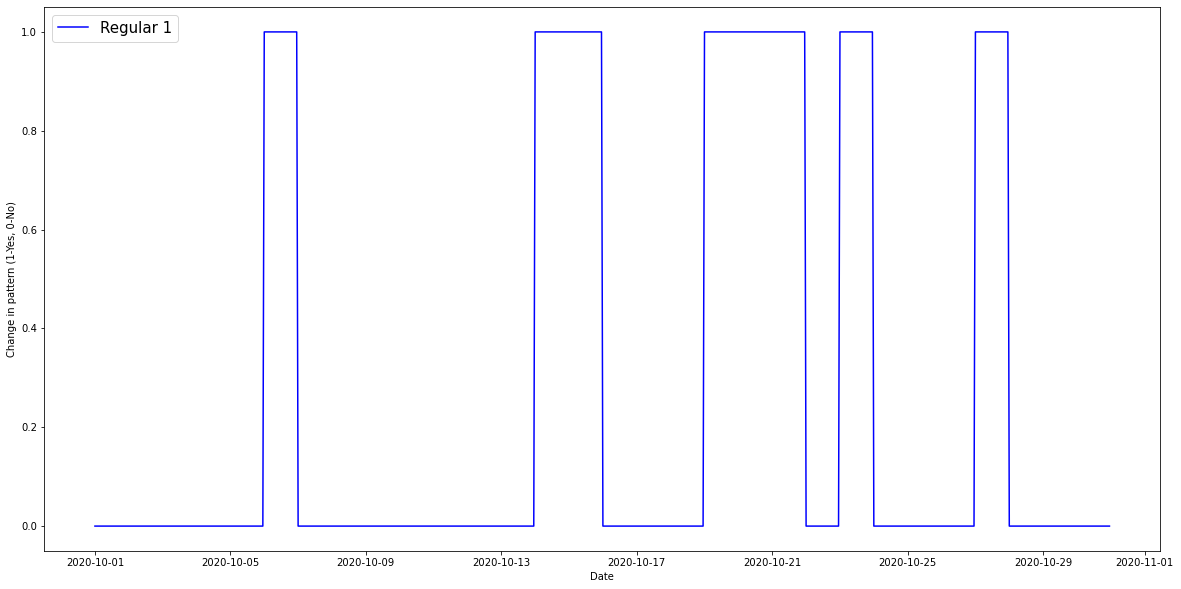

In [381]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 1'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 1 label'], 'b', label='Regular 1')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

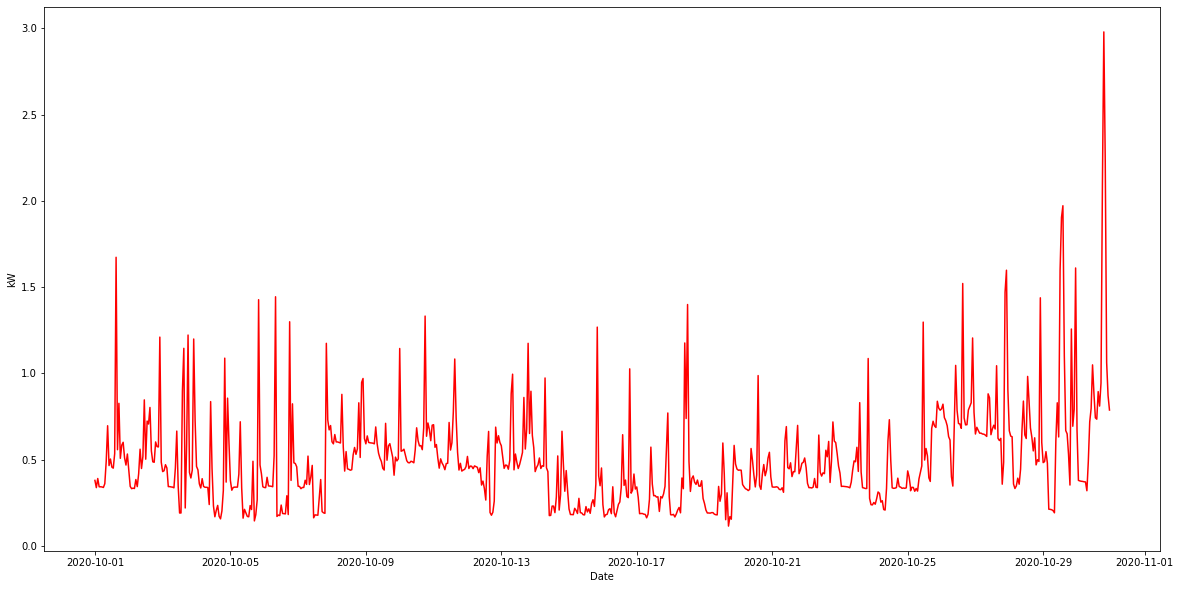

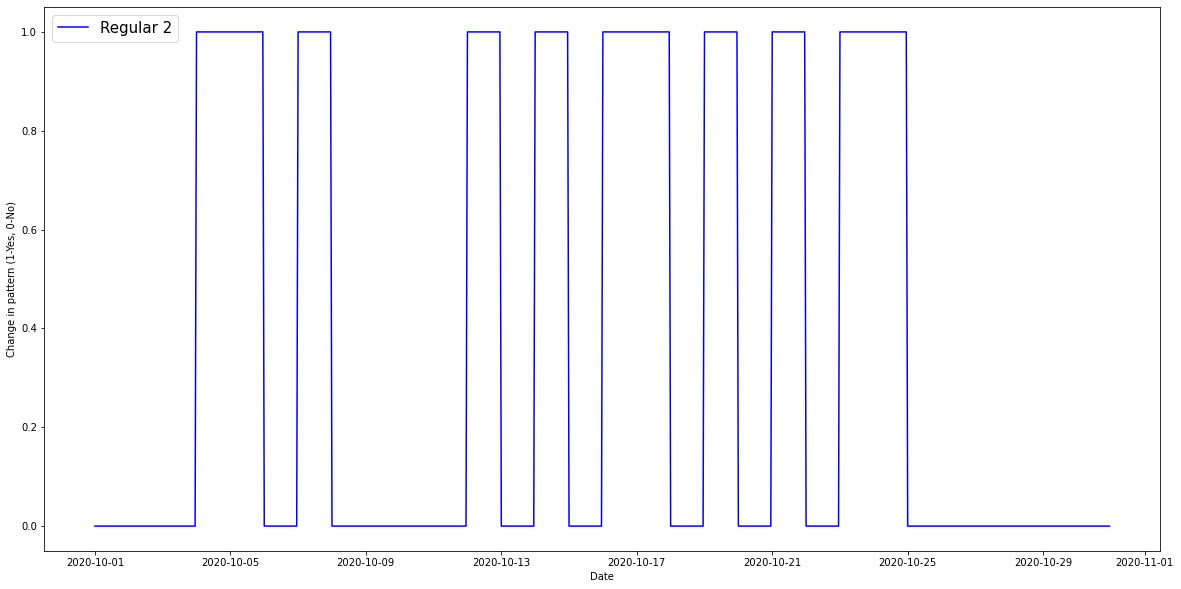

In [382]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 2'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 2 label'], 'b', label='Regular 2')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

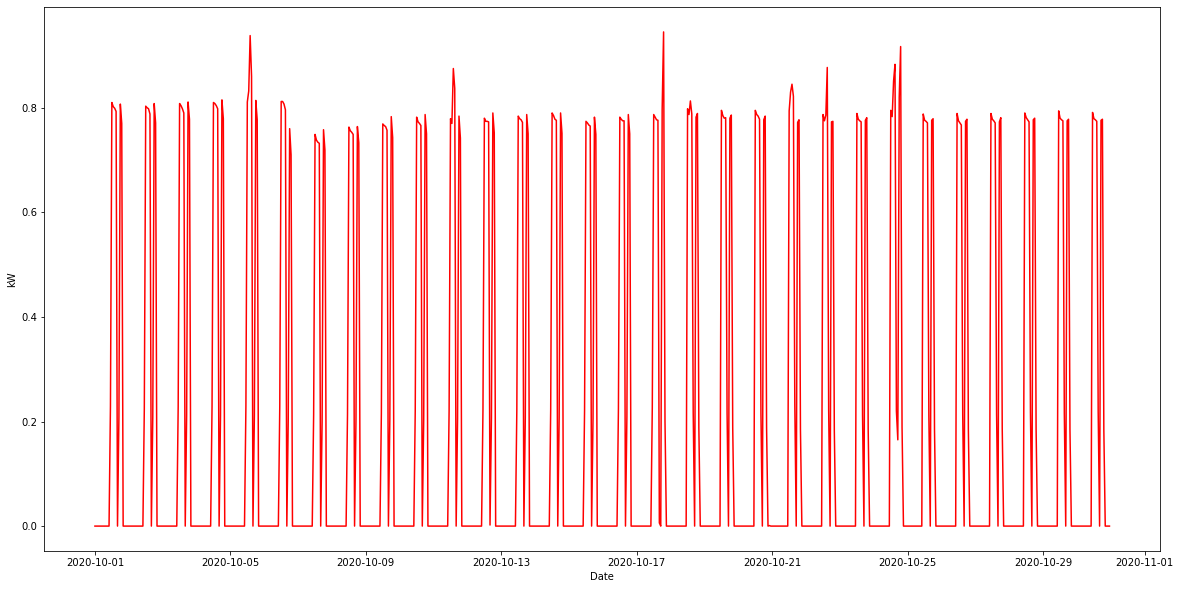

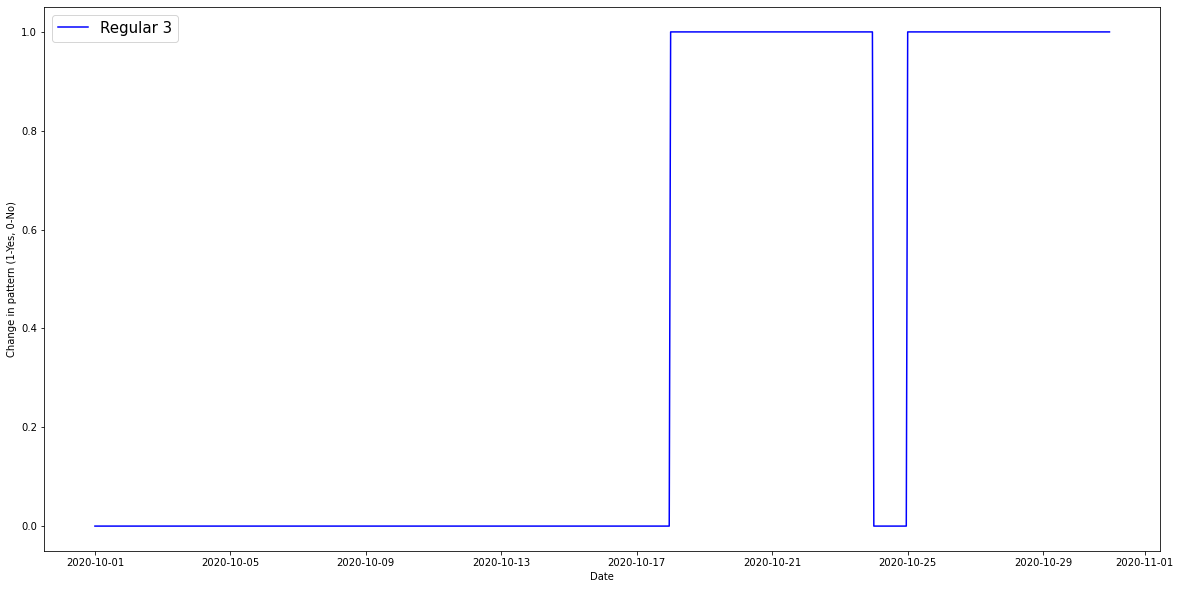

In [383]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 3'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 3 label'], 'b', label='Regular 3')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

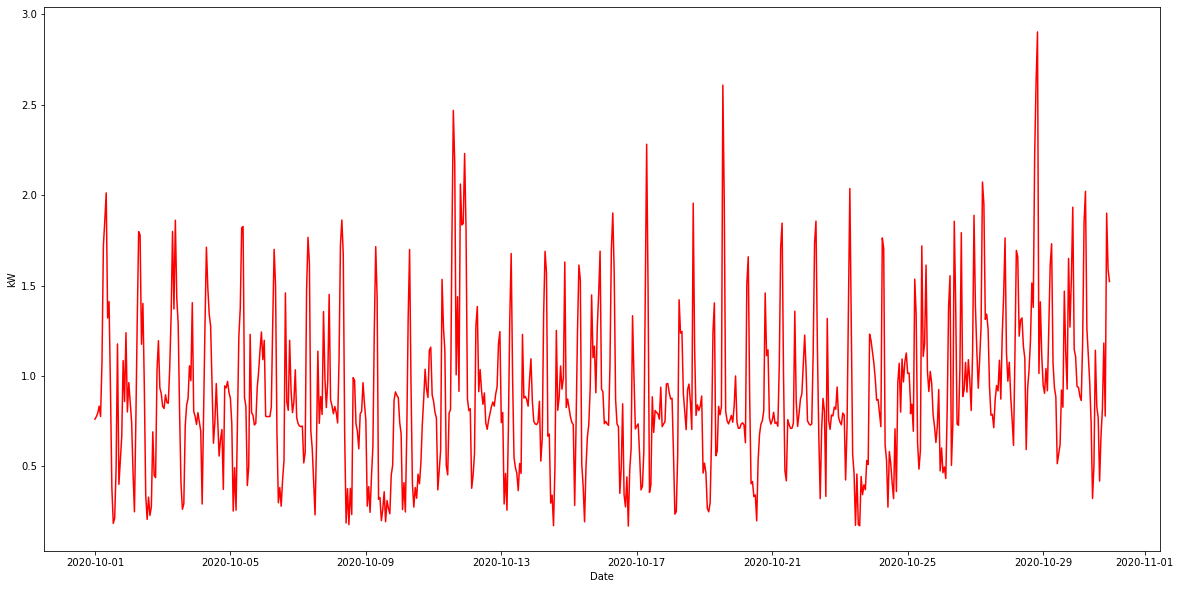

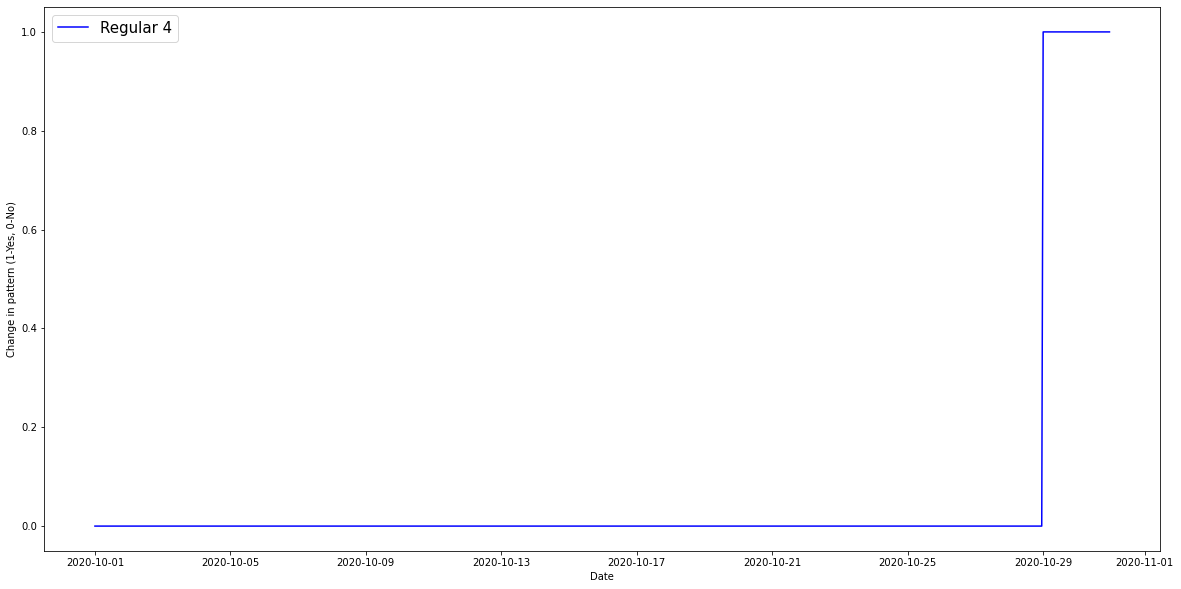

In [384]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 4'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 4 label'], 'b', label='Regular 4')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

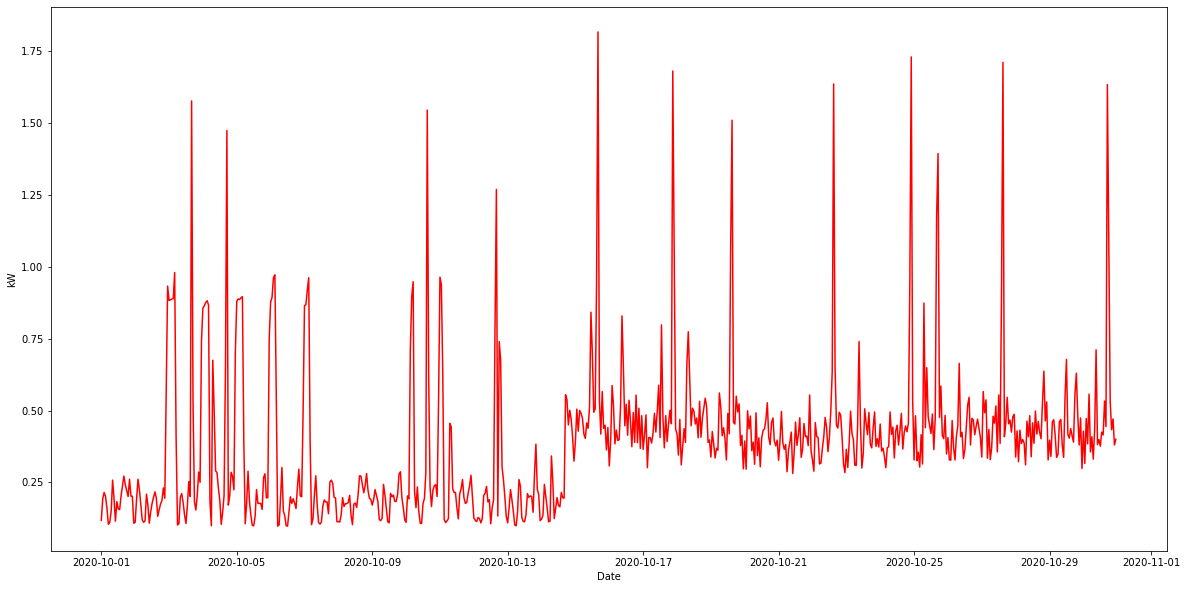

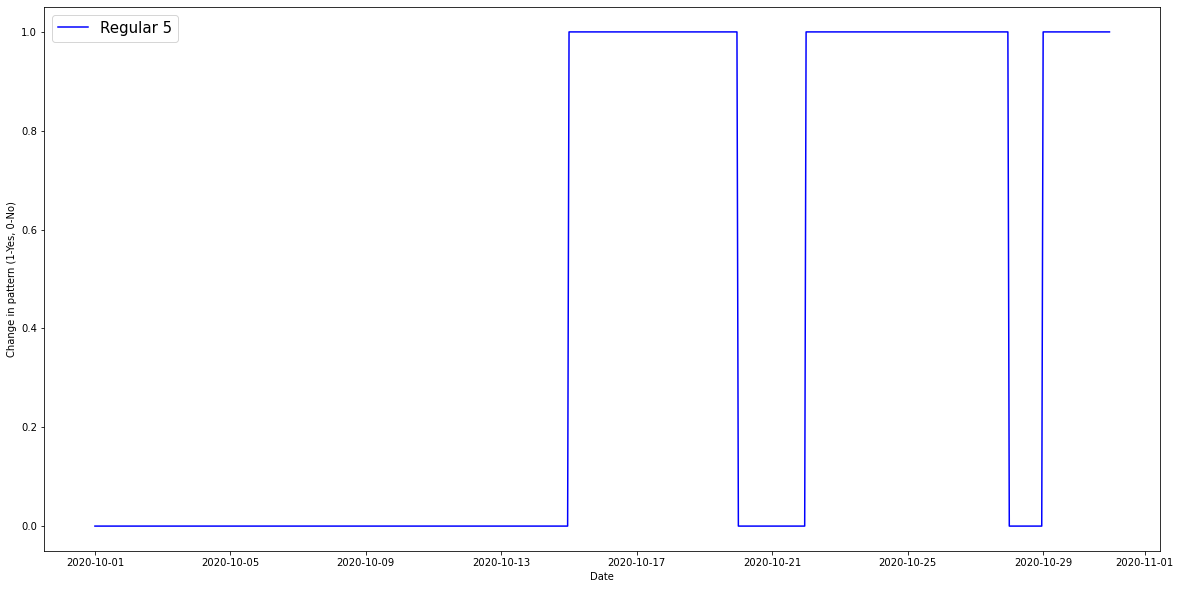

In [385]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 5'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 5 label'], 'b', label='Regular 5')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

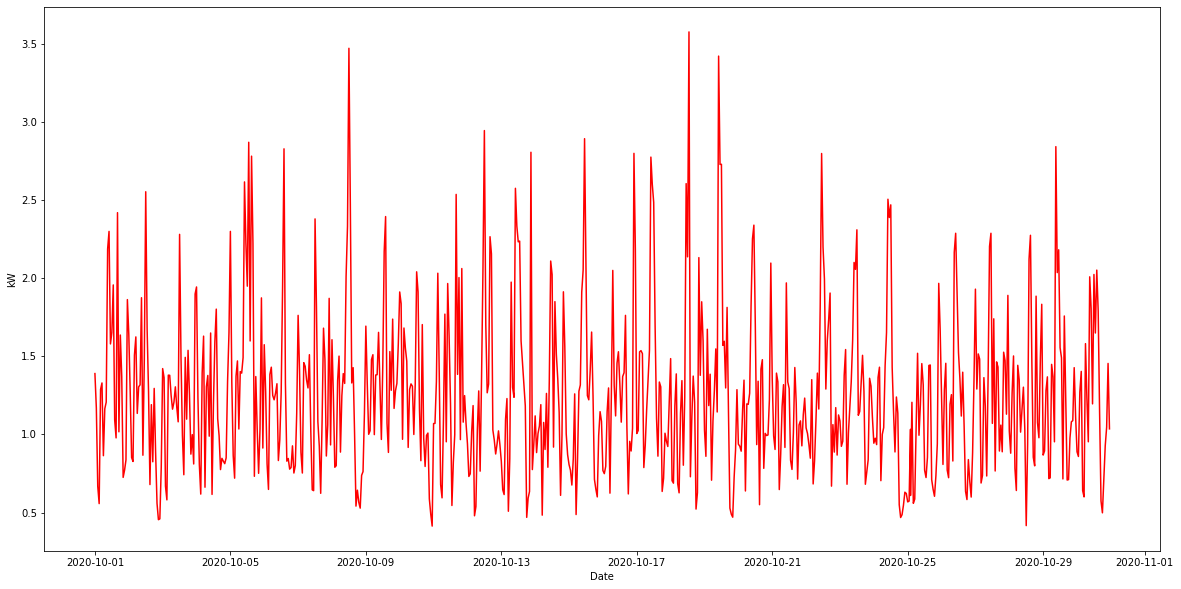

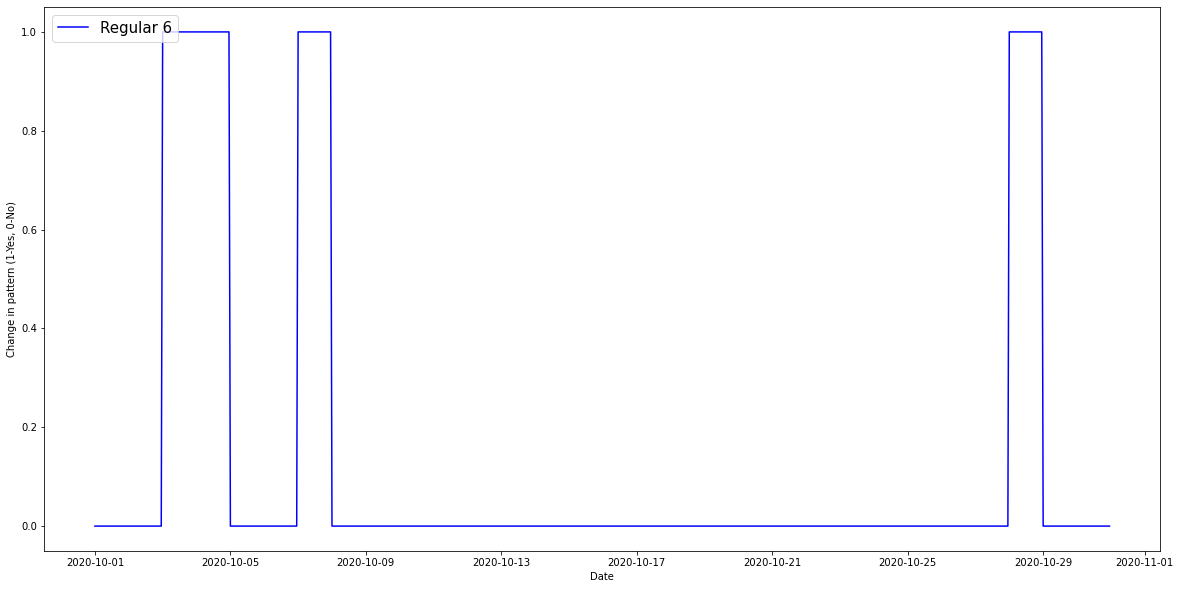

In [386]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 6'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 6 label'], 'b', label='Regular 6')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

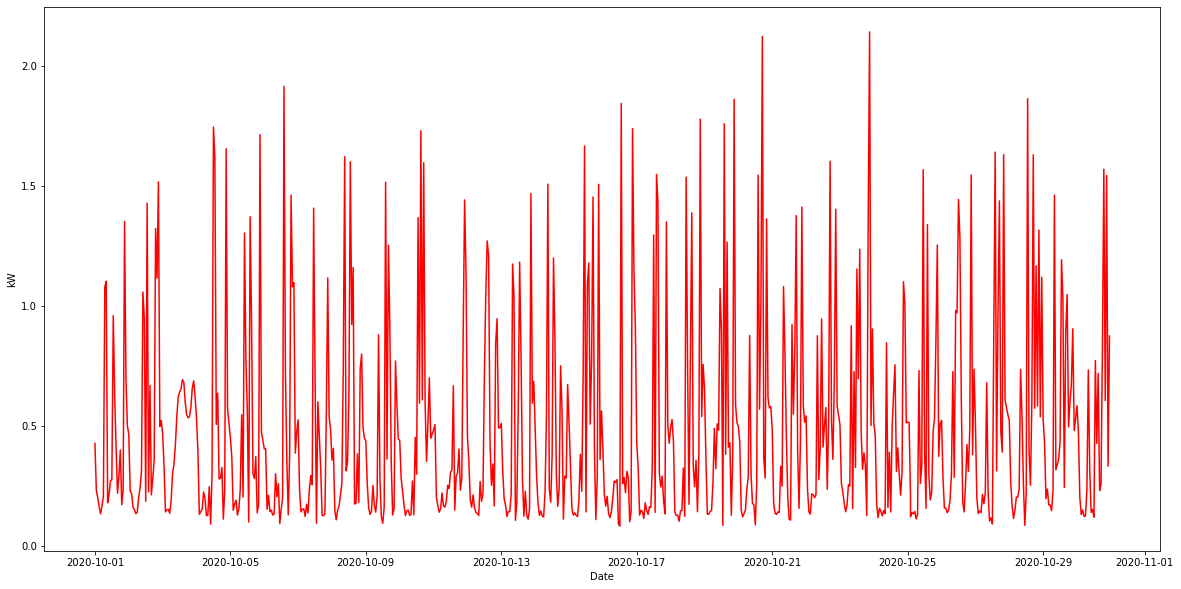

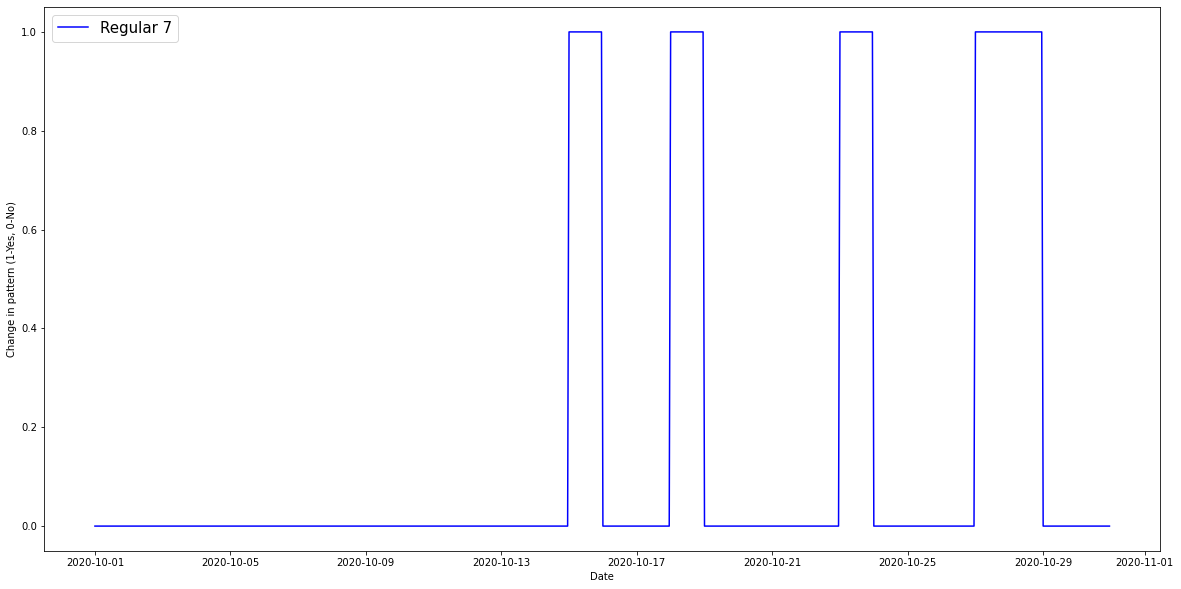

In [387]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 7'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 7 label'], 'b', label='Regular 7')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

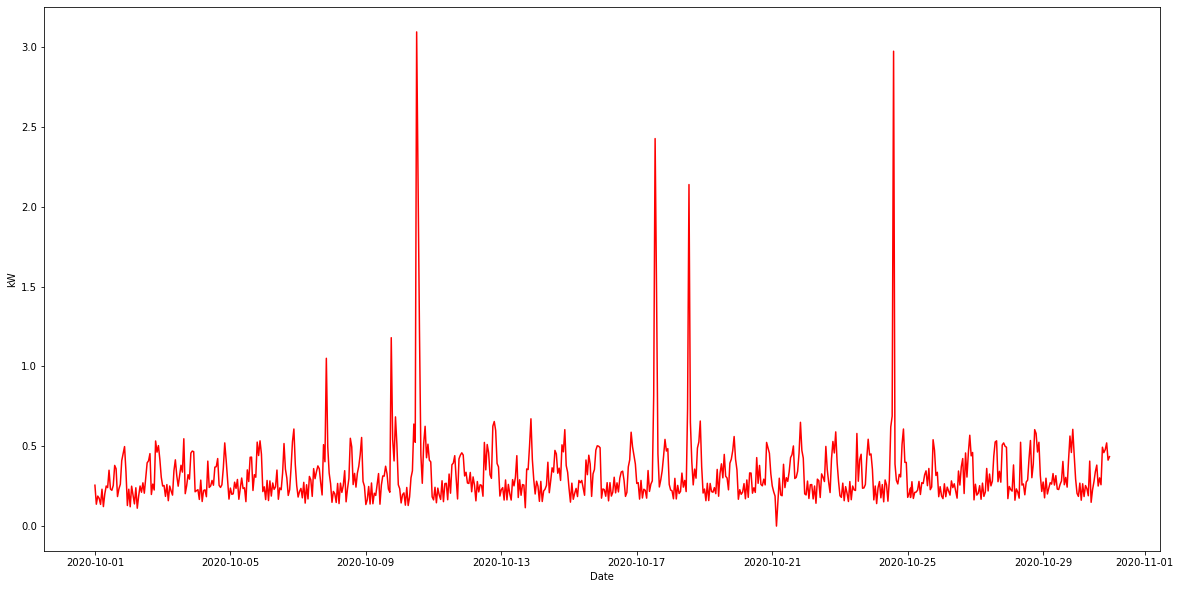

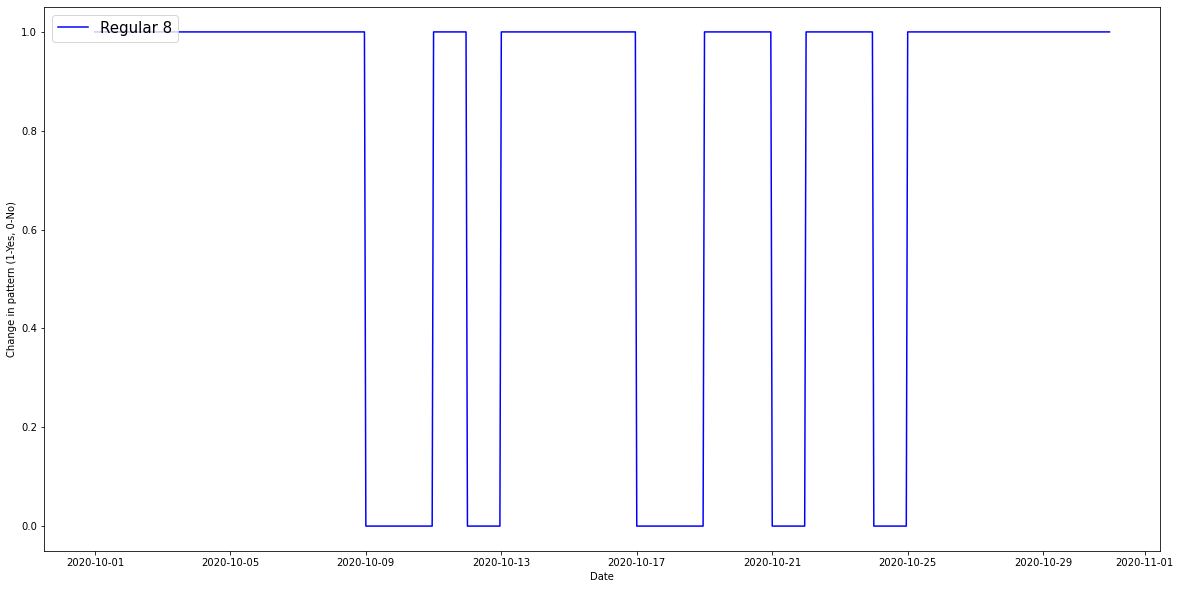

In [388]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 8'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 8 label'], 'b', label='Regular 8')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()

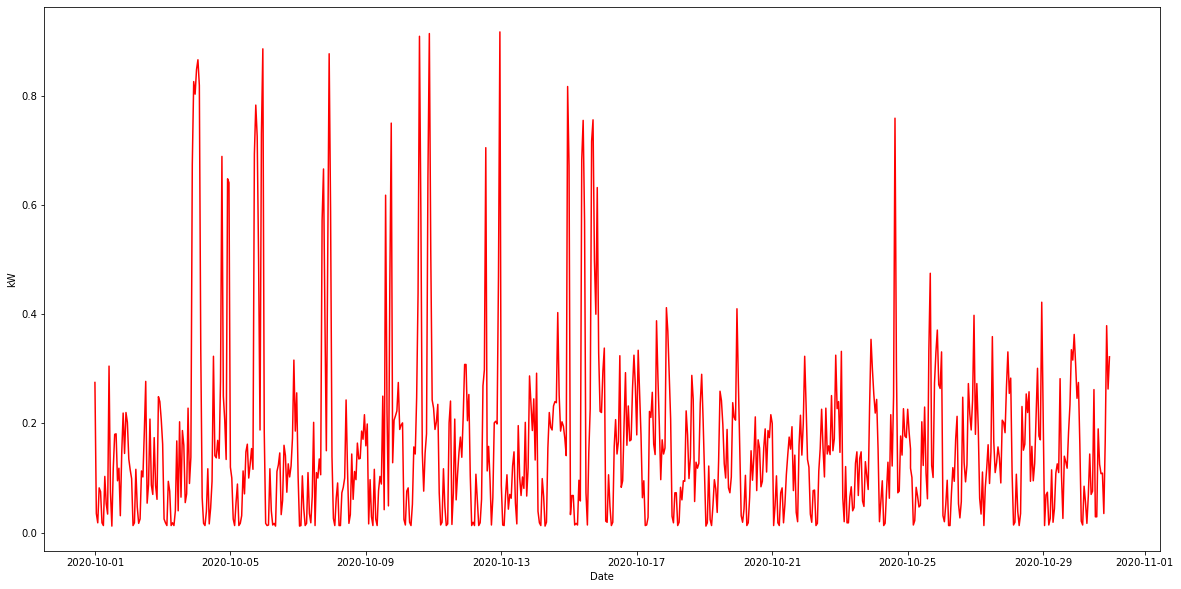

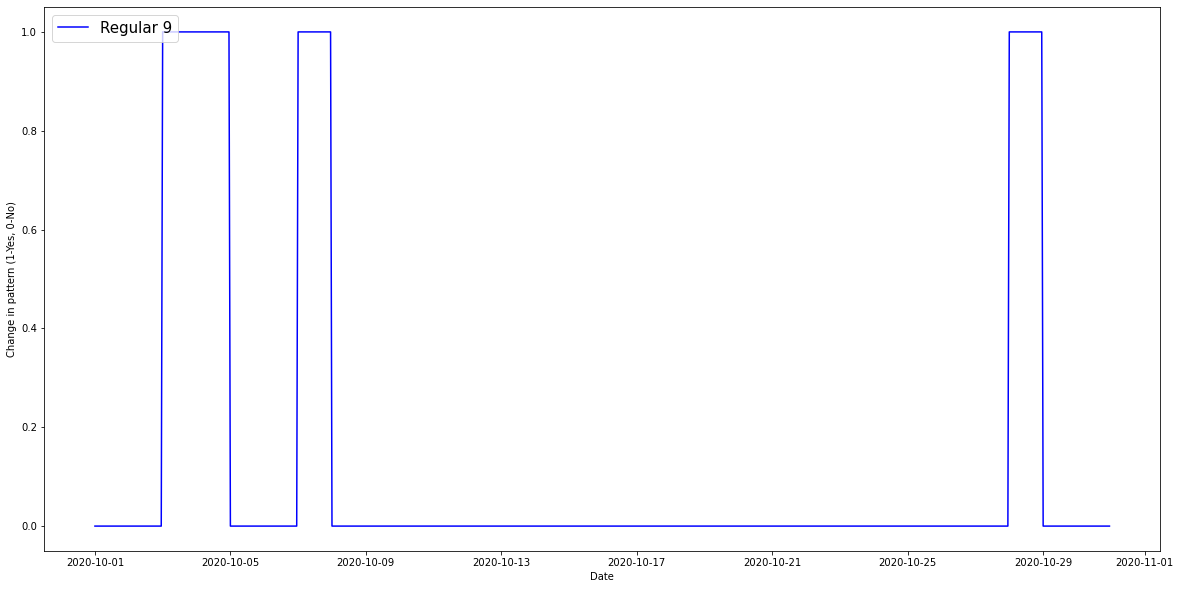

In [389]:
# Plot NTL
plot_power = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 9'], 'r')
plt.xlabel('Date')
plt.ylabel('kW')

plot_label = plt.figure(figsize=(20,10))
plt.plot(grid_label['datetime'], grid_label['regular 9 label'], 'b', label='Regular 9')
plt.xlabel('Date')
plt.ylabel('Change in pattern (1-Yes, 0-No)')
plt.legend(loc="upper left", prop={'size': 15})
plt.show()